In [1]:
import numpy as np 
import matplotlib.pylab as plt

import tensorflow as tf

In [2]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1,'r')]:
        idx = labels.flatten() == k 
        plt.scatter(xy[idx,0], xy[idx, 1], c=color)
        
    x1 =  np.linspace(-.1, 1.1)
    x2 = -W_[1] / W_[2] * x1 - W_[0] / W_[2]
    plt.plot(x1, x2, '--k')
    
    plt.grid()
    plt.show()

# 텐서플로우를 이용한 로지스틱 회귀 가정 

## 데이터 만들기

In [15]:
W = np.array([-4./5., 3./4., 1.0])

np.random.seed(327)
xy = np.random.rand(30,2)

labels = np.zeros(len(xy))
labels[ W[0] + W[1] * xy[:,0] + W[2] * xy[:,1]>0 ] = 1

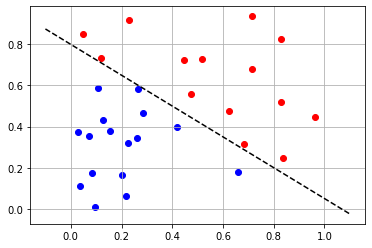

In [16]:
plot_scatter(W, xy, labels)

#### cosnt 추가해준거라 생각하면됨 

In [4]:
features = np.array([[1.0, xval, yval] for xval, yval in xy])
features[:5]

array([[1.        , 0.44795858, 0.72428867],
       [1.        , 0.28380741, 0.46408744],
       [1.        , 0.71479014, 0.67975137],
       [1.        , 0.02897187, 0.3739039 ],
       [1.        , 0.62358144, 0.4734709 ]])

## 1.2 linear model 

$$
    \begin{equation} 
        f(x) = W_0 + W_1 x_1 + W_2 x_2 \\
        f(x) = [1, x_1, x_2 ] 
        \begin{bmatrix}
            W_0 \\ W_1 \\ W_2
        \end{bmatrix}
    \end{equation}
$$

- 두 식 모두 같은 결과를 도출한다
- 내적을 구하는 식 (matmul dot)
- 실제 W는 추정해야할 값이로다 

In [17]:
features = tf.constant([[1.0, xval, yval] for xval, yval in xy])

W = tf.Variable([0,0,0], dtype=tf.float64, name='weight')

def linear_model(x):
    return tf.matmul(x, W) + b

## 1.3 sigmoid, logit

In [18]:
W = tf.Variable([0,0,0], dtype=tf.float64, name='weight')

def linear_model(x):
    return tf.sigmoid( tf.matmul(x, W)  )

## 1.4 손실함수 ( Cross Entropy ) 

In [19]:
# x 
features = tf.constant([[1, xval, yval] for xval, yval in xy], dtype=tf.float64)

# y
labels = tf.constant(labels, dtype=tf.float64)

# beta 
W = tf.Variable(np.array([[-0.5, 0.7, 1.8]]).T, dtype=tf.float64, name='weight')

b = tf.Variable([0], dtype=tf.float64)

def linear_model(x):
    return tf.sigmoid( tf.matmul(x, W) +b )

def cross_entropy(yhat, y):
    return tf.reduce_mean( -y * tf.math.log(yhat) - (1. -y) * tf.math.log(1.-yhat) )

## 1.5 최적화 과정
- 이제 적당한 maxiter와 SGD(Learning Rate)를 찾아야한다.

In [20]:
maxIter = 10000

# learning rate
#optimizer = tf.optimizers.SGD(0.01)
#optimizer = tf.optimizers.Adam(0.01)
optimizer = tf.optimizers.Adagrad(0.01)


for i in range(maxIter):
    #  주어진 입력변수에 대해서 자동으로 기울기를 구해준다. 
    with tf.GradientTape() as grad: 
        yhat = linear_model(features)
        loss = cross_entropy(yhat, labels)
        
    # 기울기 계산 
    gradients = grad.gradient( loss, W )
    
    # a,b 업데이트 
    optimizer.apply_gradients( zip( [gradients], [W] ) )
    
    print('step: {}, loss: {}, W: {}, b: {}'.format(i, loss, W.numpy().T, b.numpy() ))

step: 0, loss: 0.7891717492022889, W: [[-0.50472252  0.69746036  1.79681997]], b: [0.]
step: 1, loss: 0.7878289379205433, W: [[-0.50896137  0.69501532  1.79380776]], b: [0.]
step: 2, loss: 0.7866028835965856, W: [[-0.51283651  0.69265509  1.79093983]], b: [0.]
step: 3, loss: 0.7854680295990716, W: [[-0.51642528  0.69037151  1.78819775]], b: [0.]
step: 4, loss: 0.784407335602298, W: [[-0.51978096  0.68815774  1.78556675]], b: [0.]
step: 5, loss: 0.7834086916194846, W: [[-0.5229421   0.68600793  1.78303476]], b: [0.]
step: 6, loss: 0.7824630851391071, W: [[-0.52593768  0.68391703  1.78059178]], b: [0.]
step: 7, loss: 0.7815635705121261, W: [[-0.52879011  0.68188063  1.77822939]], b: [0.]
step: 8, loss: 0.7807046465532742, W: [[-0.53151714  0.67989487  1.77594043]], b: [0.]
step: 9, loss: 0.7798818592232654, W: [[-0.53413314  0.67795632  1.77371874]], b: [0.]
step: 10, loss: 0.7790915364884662, W: [[-0.53664991  0.67606195  1.77155899]], b: [0.]
step: 11, loss: 0.7783306048475155, W: [[-0

step: 135, loss: 0.7402543552212502, W: [[-0.67559863  0.54949244  1.63597874]], b: [0.]
step: 136, loss: 0.7400995819222466, W: [[-0.67625701  0.54883424  1.63528621]], b: [0.]
step: 137, loss: 0.7399458766487998, W: [[-0.67691215  0.54817886  1.63459663]], b: [0.]
step: 138, loss: 0.7397932274758071, W: [[-0.67756407  0.54752627  1.63390996]], b: [0.]
step: 139, loss: 0.7396416226836078, W: [[-0.67821282  0.54687645  1.63322619]], b: [0.]
step: 140, loss: 0.7394910507530713, W: [[-0.67885842  0.54622936  1.63254527]], b: [0.]
step: 141, loss: 0.7393415003608361, W: [[-0.6795009   0.54558498  1.63186719]], b: [0.]
step: 142, loss: 0.739192960374691, W: [[-0.6801403   0.5449433   1.63119191]], b: [0.]
step: 143, loss: 0.7390454198491, W: [[-0.68077664  0.54430427  1.63051941]], b: [0.]
step: 144, loss: 0.7388988680208571, W: [[-0.68140996  0.54366789  1.62984967]], b: [0.]
step: 145, loss: 0.7387532943048748, W: [[-0.68204028  0.54303412  1.62918264]], b: [0.]
step: 146, loss: 0.738608

step: 274, loss: 0.7256394496369587, W: [[-0.74515258  0.47729972  1.55964288]], b: [0.]
step: 275, loss: 0.7255686042324262, W: [[-0.74553671  0.47688315  1.55919855]], b: [0.]
step: 276, loss: 0.725498095985628, W: [[-0.74591961  0.47646769  1.55875533]], b: [0.]
step: 277, loss: 0.725427922728352, W: [[-0.74630127  0.47605331  1.5583132 ]], b: [0.]
step: 278, loss: 0.7253580823118055, W: [[-0.7466817   0.47564002  1.55787217]], b: [0.]
step: 279, loss: 0.7252885726063814, W: [[-0.74706092  0.47522781  1.55743223]], b: [0.]
step: 280, loss: 0.7252193915014248, W: [[-0.74743892  0.47481668  1.55699337]], b: [0.]
step: 281, loss: 0.7251505369050021, W: [[-0.74781571  0.47440662  1.55655559]], b: [0.]
step: 282, loss: 0.7250820067436724, W: [[-0.74819129  0.47399762  1.55611888]], b: [0.]
step: 283, loss: 0.7250137989622691, W: [[-0.74856569  0.47358968  1.55568324]], b: [0.]
step: 284, loss: 0.7249459115236773, W: [[-0.74893888  0.47318279  1.55524866]], b: [0.]
step: 285, loss: 0.7248

step: 407, loss: 0.7185301408025035, W: [[-0.7872025   0.42987164  1.50853101]], b: [0.]
step: 408, loss: 0.7184904427210399, W: [[-0.78746091  0.42956572  1.50819711]], b: [0.]
step: 409, loss: 0.7184509038958269, W: [[-0.78771859  0.42926043  1.50786383]], b: [0.]
step: 410, loss: 0.7184115235286062, W: [[-0.78797555  0.42895577  1.50753118]], b: [0.]
step: 411, loss: 0.7183723008261894, W: [[-0.78823179  0.42865174  1.50719914]], b: [0.]
step: 412, loss: 0.7183332350004241, W: [[-0.7884873   0.42834834  1.50686773]], b: [0.]
step: 413, loss: 0.7182943252681426, W: [[-0.7887421   0.42804556  1.50653693]], b: [0.]
step: 414, loss: 0.718255570851128, W: [[-0.78899619  0.42774341  1.50620674]], b: [0.]
step: 415, loss: 0.7182169709760703, W: [[-0.78924956  0.42744187  1.50587717]], b: [0.]
step: 416, loss: 0.7181785248745248, W: [[-0.78950222  0.42714096  1.50554821]], b: [0.]
step: 417, loss: 0.7181402317828735, W: [[-0.78975418  0.42684065  1.50521985]], b: [0.]
step: 418, loss: 0.718

step: 526, loss: 0.7147394865841428, W: [[-0.81342288  0.39739072  1.47265418]], b: [0.]
step: 527, loss: 0.7147142548688631, W: [[-0.8136088   0.39714738  1.47238167]], b: [0.]
step: 528, loss: 0.7146891142102563, W: [[-0.81379421  0.39690449  1.47210959]], b: [0.]
step: 529, loss: 0.7146640642060419, W: [[-0.8139791   0.39666202  1.47183794]], b: [0.]
step: 530, loss: 0.7146391044560465, W: [[-0.81416349  0.39641999  1.47156671]], b: [0.]
step: 531, loss: 0.7146142345621891, W: [[-0.81434738  0.3961784   1.4712959 ]], b: [0.]
step: 532, loss: 0.7145894541284629, W: [[-0.81453075  0.39593723  1.4710255 ]], b: [0.]
step: 533, loss: 0.7145647627609285, W: [[-0.81471363  0.3956965   1.47075553]], b: [0.]
step: 534, loss: 0.7145401600676942, W: [[-0.814896    0.39545619  1.47048598]], b: [0.]
step: 535, loss: 0.7145156456589095, W: [[-0.81507787  0.39521631  1.47021684]], b: [0.]
step: 536, loss: 0.7144912191467431, W: [[-0.81525924  0.39497686  1.46994811]], b: [0.]
step: 537, loss: 0.71

step: 644, loss: 0.7122974014322279, W: [[-0.83216087  0.37139391  1.44313521]], b: [0.]
step: 645, loss: 0.712280610414168, W: [[-0.83229464  0.37119471  1.44290547]], b: [0.]
step: 646, loss: 0.7122638745490301, W: [[-0.83242802  0.37099583  1.44267603]], b: [0.]
step: 647, loss: 0.7122471936113361, W: [[-0.83256102  0.37079727  1.44244689]], b: [0.]
step: 648, loss: 0.7122305673766485, W: [[-0.83269365  0.37059902  1.44221807]], b: [0.]
step: 649, loss: 0.7122139956215612, W: [[-0.83282589  0.3704011   1.44198955]], b: [0.]
step: 650, loss: 0.7121974781236974, W: [[-0.83295776  0.37020349  1.44176133]], b: [0.]
step: 651, loss: 0.712181014661699, W: [[-0.83308925  0.3700062   1.44153342]], b: [0.]
step: 652, loss: 0.712164605015227, W: [[-0.83322036  0.36980922  1.44130581]], b: [0.]
step: 653, loss: 0.7121482489649525, W: [[-0.8333511   0.36961255  1.4410785 ]], b: [0.]
step: 654, loss: 0.7121319462925494, W: [[-0.83348146  0.3694162   1.4408515 ]], b: [0.]
step: 655, loss: 0.71211

step: 781, loss: 0.7104290488438172, W: [[-0.84726588  0.3467859   1.4142346 ]], b: [0.]
step: 782, loss: 0.7104180809680525, W: [[-0.84735455  0.34662415  1.41404074]], b: [0.]
step: 783, loss: 0.7104071450897669, W: [[-0.84744293  0.34646264  1.41384711]], b: [0.]
step: 784, loss: 0.7103962410853902, W: [[-0.84753103  0.34630135  1.41365369]], b: [0.]
step: 785, loss: 0.7103853688318744, W: [[-0.84761885  0.3461403   1.4134605 ]], b: [0.]
step: 786, loss: 0.710374528206681, W: [[-0.84770639  0.34597948  1.41326753]], b: [0.]
step: 787, loss: 0.7103637190877887, W: [[-0.84779365  0.34581889  1.41307477]], b: [0.]
step: 788, loss: 0.7103529413536851, W: [[-0.84788063  0.34565853  1.41288224]], b: [0.]
step: 789, loss: 0.710342194883369, W: [[-0.84796733  0.3454984   1.41268992]], b: [0.]
step: 790, loss: 0.71033147955634, W: [[-0.84805375  0.3453385   1.41249782]], b: [0.]
step: 791, loss: 0.7103207952526055, W: [[-0.8481399   0.34517882  1.41230594]], b: [0.]
step: 792, loss: 0.710310

step: 913, loss: 0.7092172249814082, W: [[-0.85672979  0.32727129  1.3903911 ]], b: [0.]
step: 914, loss: 0.7092095806107812, W: [[-0.85678573  0.32713632  1.39022267]], b: [0.]
step: 915, loss: 0.7092019556295165, W: [[-0.85684145  0.32700153  1.39005441]], b: [0.]
step: 916, loss: 0.7091943499654724, W: [[-0.85689696  0.32686691  1.38988631]], b: [0.]
step: 917, loss: 0.7091867635467944, W: [[-0.85695225  0.32673247  1.38971838]], b: [0.]
step: 918, loss: 0.7091791963019142, W: [[-0.85700733  0.3265982   1.38955062]], b: [0.]
step: 919, loss: 0.709171648159544, W: [[-0.85706219  0.32646411  1.38938301]], b: [0.]
step: 920, loss: 0.7091641190486813, W: [[-0.85711684  0.32633019  1.38921558]], b: [0.]
step: 921, loss: 0.7091566088986027, W: [[-0.85717128  0.32619645  1.38904831]], b: [0.]
step: 922, loss: 0.7091491176388667, W: [[-0.8572255   0.32606288  1.3888812 ]], b: [0.]
step: 923, loss: 0.7091416451993087, W: [[-0.85727951  0.32592948  1.38871426]], b: [0.]
step: 924, loss: 0.709

step: 1008, loss: 0.7085684422875334, W: [[-0.8611352   0.31518813  1.37508817]], b: [0.]
step: 1009, loss: 0.7085623538025867, W: [[-0.86117239  0.3150684   1.37493411]], b: [0.]
step: 1010, loss: 0.7085562789781685, W: [[-0.8612094   0.31494881  1.3747802 ]], b: [0.]
step: 1011, loss: 0.7085502177645625, W: [[-0.86124623  0.31482936  1.37462642]], b: [0.]
step: 1012, loss: 0.7085441701122441, W: [[-0.86128289  0.31471006  1.37447278]], b: [0.]
step: 1013, loss: 0.7085381359718814, W: [[-0.86131936  0.31459091  1.37431928]], b: [0.]
step: 1014, loss: 0.7085321152943319, W: [[-0.86135566  0.3144719   1.37416591]], b: [0.]
step: 1015, loss: 0.7085261080306423, W: [[-0.86139178  0.31435303  1.37401267]], b: [0.]
step: 1016, loss: 0.7085201141320486, W: [[-0.86142773  0.31423431  1.37385958]], b: [0.]
step: 1017, loss: 0.7085141335499747, W: [[-0.86146349  0.31411573  1.37370661]], b: [0.]
step: 1018, loss: 0.708508166236034, W: [[-0.86149908  0.3139973   1.37355379]], b: [0.]
step: 1019,

step: 1143, loss: 0.7078524134952142, W: [[-0.86466467  0.30023443  1.35542953]], b: [0.]
step: 1144, loss: 0.7078477872136671, W: [[-0.86468054  0.30013201  1.35529175]], b: [0.]
step: 1145, loss: 0.7078431693441831, W: [[-0.86469626  0.3000297   1.35515407]], b: [0.]
step: 1146, loss: 0.7078385598570793, W: [[-0.86471186  0.29992751  1.3550165 ]], b: [0.]
step: 1147, loss: 0.7078339587227798, W: [[-0.86472731  0.29982542  1.35487904]], b: [0.]
step: 1148, loss: 0.7078293659118235, W: [[-0.86474262  0.29972345  1.35474168]], b: [0.]
step: 1149, loss: 0.7078247813948587, W: [[-0.8647578   0.2996216   1.35460443]], b: [0.]
step: 1150, loss: 0.7078202051426439, W: [[-0.86477285  0.29951985  1.35446728]], b: [0.]
step: 1151, loss: 0.7078156371260494, W: [[-0.86478775  0.29941821  1.35433023]], b: [0.]
step: 1152, loss: 0.7078110773160533, W: [[-0.86480252  0.29931669  1.35419329]], b: [0.]
step: 1153, loss: 0.7078065256837444, W: [[-0.86481715  0.29921527  1.35405645]], b: [0.]
step: 1154

step: 1273, loss: 0.7073120675192415, W: [[-0.86565893  0.28779215  1.33833546]], b: [0.]
step: 1274, loss: 0.7073083214295818, W: [[-0.8656589   0.28770274  1.33820986]], b: [0.]
step: 1275, loss: 0.7073045806931046, W: [[-0.86565877  0.28761341  1.33808434]], b: [0.]
step: 1276, loss: 0.7073008452915721, W: [[-0.86565852  0.28752416  1.3379589 ]], b: [0.]
step: 1277, loss: 0.7072971152068104, W: [[-0.86565817  0.28743501  1.33783355]], b: [0.]
step: 1278, loss: 0.7072933904207162, W: [[-0.86565771  0.28734594  1.33770828]], b: [0.]
step: 1279, loss: 0.7072896709152502, W: [[-0.86565715  0.28725697  1.33758309]], b: [0.]
step: 1280, loss: 0.7072859566724444, W: [[-0.86565648  0.28716808  1.33745798]], b: [0.]
step: 1281, loss: 0.707282247674392, W: [[-0.8656557   0.28707927  1.33733296]], b: [0.]
step: 1282, loss: 0.707278543903258, W: [[-0.86565482  0.28699056  1.33720801]], b: [0.]
step: 1283, loss: 0.7072748453412696, W: [[-0.86565383  0.28690193  1.33708315]], b: [0.]
step: 1284, 

step: 1407, loss: 0.7068514325242573, W: [[-0.86477416  0.27654001  1.3221878 ]], b: [0.]
step: 1408, loss: 0.7068482647812664, W: [[-0.86476144  0.27646115  1.32207207]], b: [0.]
step: 1409, loss: 0.7068451004615244, W: [[-0.86474863  0.27638236  1.32195641]], b: [0.]
step: 1410, loss: 0.7068419395539207, W: [[-0.86473575  0.27630363  1.32184081]], b: [0.]
step: 1411, loss: 0.7068387820473853, W: [[-0.86472278  0.27622498  1.32172528]], b: [0.]
step: 1412, loss: 0.7068356279308876, W: [[-0.86470973  0.27614639  1.32160982]], b: [0.]
step: 1413, loss: 0.7068324771934398, W: [[-0.86469659  0.27606788  1.32149442]], b: [0.]
step: 1414, loss: 0.7068293298240903, W: [[-0.86468338  0.27598943  1.32137908]], b: [0.]
step: 1415, loss: 0.7068261858119327, W: [[-0.86467008  0.27591105  1.32126381]], b: [0.]
step: 1416, loss: 0.7068230451460962, W: [[-0.8646567   0.27583274  1.3211486 ]], b: [0.]
step: 1417, loss: 0.7068199078157532, W: [[-0.86464324  0.2757545   1.32103346]], b: [0.]
step: 1418

step: 1539, loss: 0.7064591742197472, W: [[-0.86243618  0.26669017  1.30743641]], b: [0.]
step: 1540, loss: 0.706456375885091, W: [[-0.86241382  0.26661954  1.3073284 ]], b: [0.]
step: 1541, loss: 0.7064535798089373, W: [[-0.8623914   0.26654897  1.30722044]], b: [0.]
step: 1542, loss: 0.7064507859844343, W: [[-0.86236891  0.26647846  1.30711253]], b: [0.]
step: 1543, loss: 0.7064479944047533, W: [[-0.86234636  0.266408    1.30700468]], b: [0.]
step: 1544, loss: 0.7064452050630929, W: [[-0.86232375  0.26633759  1.30689688]], b: [0.]
step: 1545, loss: 0.7064424179526744, W: [[-0.86230108  0.26626724  1.30678913]], b: [0.]
step: 1546, loss: 0.7064396330667435, W: [[-0.86227834  0.26619695  1.30668143]], b: [0.]
step: 1547, loss: 0.7064368503985737, W: [[-0.86225554  0.26612671  1.30657378]], b: [0.]
step: 1548, loss: 0.7064340699414594, W: [[-0.86223267  0.26605653  1.30646618]], b: [0.]
step: 1549, loss: 0.7064312916887212, W: [[-0.86220974  0.2659864   1.30635864]], b: [0.]
step: 1550,

step: 1668, loss: 0.7061146911285258, W: [[-0.85906705  0.25800735  1.29390477]], b: [0.]
step: 1669, loss: 0.7061121353498535, W: [[-0.85903743  0.25794317  1.29380282]], b: [0.]
step: 1670, loss: 0.7061095811226947, W: [[-0.85900777  0.25787904  1.29370092]], b: [0.]
step: 1671, loss: 0.7061070284427565, W: [[-0.85897805  0.25781496  1.29359905]], b: [0.]
step: 1672, loss: 0.7061044773057628, W: [[-0.85894828  0.25775092  1.29349723]], b: [0.]
step: 1673, loss: 0.7061019277074517, W: [[-0.85891847  0.25768693  1.29339545]], b: [0.]
step: 1674, loss: 0.7060993796435787, W: [[-0.8588886   0.25762298  1.29329371]], b: [0.]
step: 1675, loss: 0.7060968331099121, W: [[-0.85885869  0.25755908  1.29319202]], b: [0.]
step: 1676, loss: 0.7060942881022378, W: [[-0.85882873  0.25749522  1.29309036]], b: [0.]
step: 1677, loss: 0.7060917446163546, W: [[-0.85879872  0.2574314   1.29298875]], b: [0.]
step: 1678, loss: 0.7060892026480795, W: [[-0.85876866  0.25736763  1.29288718]], b: [0.]
step: 1679

step: 1799, loss: 0.7057916891588962, W: [[-0.85480266  0.24995719  1.28088585]], b: [0.]
step: 1800, loss: 0.7057893051325538, W: [[-0.85476739  0.24989831  1.2807889 ]], b: [0.]
step: 1801, loss: 0.7057869222084918, W: [[-0.85473207  0.24983947  1.28069199]], b: [0.]
step: 1802, loss: 0.7057845403840273, W: [[-0.85469672  0.24978067  1.28059511]], b: [0.]
step: 1803, loss: 0.7057821596564844, W: [[-0.85466134  0.2497219   1.28049827]], b: [0.]
step: 1804, loss: 0.7057797800232005, W: [[-0.85462591  0.24966317  1.28040146]], b: [0.]
step: 1805, loss: 0.7057774014815201, W: [[-0.85459045  0.24960448  1.28030468]], b: [0.]
step: 1806, loss: 0.705775024028799, W: [[-0.85455495  0.24954582  1.28020794]], b: [0.]
step: 1807, loss: 0.705772647662401, W: [[-0.85451942  0.24948719  1.28011124]], b: [0.]
step: 1808, loss: 0.7057702723796986, W: [[-0.85448385  0.24942861  1.28001457]], b: [0.]
step: 1809, loss: 0.7057678981780754, W: [[-0.85444824  0.24937006  1.27991793]], b: [0.]
step: 1810, 

step: 1922, loss: 0.7055059918511148, W: [[-0.85020506  0.24297153  1.26920473]], b: [0.]
step: 1923, loss: 0.7055037258670084, W: [[-0.85016572  0.24291672  1.26911166]], b: [0.]
step: 1924, loss: 0.7055014607171805, W: [[-0.85012635  0.24286194  1.26901861]], b: [0.]
step: 1925, loss: 0.7054991963998921, W: [[-0.85008696  0.2428072   1.26892559]], b: [0.]
step: 1926, loss: 0.705496932913413, W: [[-0.85004753  0.24275248  1.2688326 ]], b: [0.]
step: 1927, loss: 0.7054946702560164, W: [[-0.85000808  0.24269779  1.26873964]], b: [0.]
step: 1928, loss: 0.7054924084259839, W: [[-0.8499686   0.24264313  1.2686467 ]], b: [0.]
step: 1929, loss: 0.7054901474216005, W: [[-0.84992909  0.2425885   1.2685538 ]], b: [0.]
step: 1930, loss: 0.7054878872411593, W: [[-0.84988955  0.2425339   1.26846092]], b: [0.]
step: 1931, loss: 0.7054856278829592, W: [[-0.84984998  0.24247933  1.26836807]], b: [0.]
step: 1932, loss: 0.7054833693453034, W: [[-0.84981039  0.2424248   1.26827525]], b: [0.]
step: 1933,

step: 2037, loss: 0.7052504820903813, W: [[-0.84550702  0.23685473  1.25867919]], b: [0.]
step: 2038, loss: 0.7052483020144056, W: [[-0.84546475  0.23680309  1.25858916]], b: [0.]
step: 2039, loss: 0.7052461226076973, W: [[-0.84542246  0.23675148  1.25849915]], b: [0.]
step: 2040, loss: 0.7052439438690918, W: [[-0.84538015  0.2366999   1.25840916]], b: [0.]
step: 2041, loss: 0.7052417657974254, W: [[-0.84533781  0.23664834  1.25831921]], b: [0.]
step: 2042, loss: 0.705239588391539, W: [[-0.84529546  0.23659681  1.25822927]], b: [0.]
step: 2043, loss: 0.7052374116502784, W: [[-0.84525308  0.2365453   1.25813936]], b: [0.]
step: 2044, loss: 0.7052352355724907, W: [[-0.84521068  0.23649382  1.25804948]], b: [0.]
step: 2045, loss: 0.70523306015703, W: [[-0.84516826  0.23644236  1.25795961]], b: [0.]
step: 2046, loss: 0.7052308854027534, W: [[-0.84512581  0.23639093  1.25786978]], b: [0.]
step: 2047, loss: 0.7052287113085208, W: [[-0.84508335  0.23633952  1.25777996]], b: [0.]
step: 2048, l

step: 2168, loss: 0.7049702063783441, W: [[-0.83979774  0.23029338  1.2470812 ]], b: [0.]
step: 2169, loss: 0.7049681053438308, W: [[-0.83975296  0.23024477  1.2469941 ]], b: [0.]
step: 2170, loss: 0.7049660048549032, W: [[-0.83970815  0.23019618  1.24690702]], b: [0.]
step: 2171, loss: 0.7049639049108103, W: [[-0.83966333  0.23014761  1.24681996]], b: [0.]
step: 2172, loss: 0.7049618055108041, W: [[-0.8396185   0.23009907  1.24673292]], b: [0.]
step: 2173, loss: 0.704959706654137, W: [[-0.83957364  0.23005054  1.24664591]], b: [0.]
step: 2174, loss: 0.7049576083400666, W: [[-0.83952878  0.23000204  1.24655891]], b: [0.]
step: 2175, loss: 0.7049555105678506, W: [[-0.83948389  0.22995355  1.24647193]], b: [0.]
step: 2176, loss: 0.7049534133367507, W: [[-0.83943899  0.22990509  1.24638498]], b: [0.]
step: 2177, loss: 0.70495131664603, W: [[-0.83939407  0.22985665  1.24629804]], b: [0.]
step: 2178, loss: 0.704949220494955, W: [[-0.83934914  0.22980823  1.24621113]], b: [0.]
step: 2179, lo

step: 2261, loss: 0.7047770534858212, W: [[-0.83556747  0.22585896  1.23906546]], b: [0.]
step: 2262, loss: 0.7047750002735547, W: [[-0.83552133  0.22581219  1.23898017]], b: [0.]
step: 2263, loss: 0.7047729475465184, W: [[-0.83547516  0.22576543  1.23889489]], b: [0.]
step: 2264, loss: 0.7047708953041545, W: [[-0.83542899  0.22571869  1.23880963]], b: [0.]
step: 2265, loss: 0.7047688435459114, W: [[-0.8353828   0.22567198  1.23872438]], b: [0.]
step: 2266, loss: 0.7047667922712352, W: [[-0.8353366   0.22562528  1.23863916]], b: [0.]
step: 2267, loss: 0.7047647414795759, W: [[-0.83529039  0.2255786   1.23855395]], b: [0.]
step: 2268, loss: 0.704762691170385, W: [[-0.83524417  0.22553194  1.23846876]], b: [0.]
step: 2269, loss: 0.704760641343115, W: [[-0.83519793  0.22548529  1.23838359]], b: [0.]
step: 2270, loss: 0.7047585919972221, W: [[-0.83515168  0.22543867  1.23829844]], b: [0.]
step: 2271, loss: 0.704756543132161, W: [[-0.83510541  0.22539206  1.23821331]], b: [0.]
step: 2272, l

step: 2356, loss: 0.7045840932153538, W: [[-0.83112997  0.22149501  1.23104082]], b: [0.]
step: 2357, loss: 0.7045820838437291, W: [[-0.83108274  0.22144989  1.23095716]], b: [0.]
step: 2358, loss: 0.7045800749116037, W: [[-0.83103549  0.22140479  1.23087352]], b: [0.]
step: 2359, loss: 0.7045780664185627, W: [[-0.83098823  0.22135971  1.2307899 ]], b: [0.]
step: 2360, loss: 0.7045760583641943, W: [[-0.83094096  0.22131464  1.23070629]], b: [0.]
step: 2361, loss: 0.7045740507480885, W: [[-0.83089368  0.22126959  1.2306227 ]], b: [0.]
step: 2362, loss: 0.7045720435698335, W: [[-0.8308464   0.22122456  1.23053913]], b: [0.]
step: 2363, loss: 0.7045700368290222, W: [[-0.8307991   0.22117954  1.23045557]], b: [0.]
step: 2364, loss: 0.7045680305252462, W: [[-0.83075179  0.22113454  1.23037203]], b: [0.]
step: 2365, loss: 0.7045660246581004, W: [[-0.83070447  0.22108955  1.2302885 ]], b: [0.]
step: 2366, loss: 0.7045640192271787, W: [[-0.83065714  0.22104458  1.23020499]], b: [0.]
step: 2367

step: 2458, loss: 0.704381335108335, W: [[-0.82626459  0.21697419  1.22258905]], b: [0.]
step: 2459, loss: 0.7043793686319004, W: [[-0.82621646  0.21693065  1.22250698]], b: [0.]
step: 2460, loss: 0.7043774025585107, W: [[-0.82616833  0.21688712  1.22242491]], b: [0.]
step: 2461, loss: 0.7043754368878586, W: [[-0.82612019  0.2168436   1.22234286]], b: [0.]
step: 2462, loss: 0.7043734716196395, W: [[-0.82607204  0.2168001   1.22226082]], b: [0.]
step: 2463, loss: 0.7043715067535462, W: [[-0.82602388  0.21675661  1.2221788 ]], b: [0.]
step: 2464, loss: 0.7043695422892774, W: [[-0.82597572  0.21671314  1.2220968 ]], b: [0.]
step: 2465, loss: 0.7043675782265283, W: [[-0.82592755  0.21666968  1.2220148 ]], b: [0.]
step: 2466, loss: 0.7043656145649962, W: [[-0.82587937  0.21662624  1.22193283]], b: [0.]
step: 2467, loss: 0.7043636513043822, W: [[-0.82583119  0.21658281  1.22185086]], b: [0.]
step: 2468, loss: 0.704361688444383, W: [[-0.82578299  0.2165394   1.22176892]], b: [0.]
step: 2469, 

step: 2565, loss: 0.7041731511045858, W: [[-0.82107734  0.21239367  1.21388642]], b: [0.]
step: 2566, loss: 0.7041712261724598, W: [[-0.82102854  0.21235158  1.21380582]], b: [0.]
step: 2567, loss: 0.7041693016149291, W: [[-0.82097974  0.21230951  1.21372524]], b: [0.]
step: 2568, loss: 0.704167377431767, W: [[-0.82093093  0.21226744  1.21364466]], b: [0.]
step: 2569, loss: 0.7041654536227414, W: [[-0.82088212  0.21222539  1.2135641 ]], b: [0.]
step: 2570, loss: 0.7041635301876269, W: [[-0.8208333   0.21218335  1.21348356]], b: [0.]
step: 2571, loss: 0.7041616071261956, W: [[-0.82078448  0.21214133  1.21340302]], b: [0.]
step: 2572, loss: 0.7041596844382192, W: [[-0.82073565  0.21209932  1.2133225 ]], b: [0.]
step: 2573, loss: 0.7041577621234719, W: [[-0.82068681  0.21205732  1.21324199]], b: [0.]
step: 2574, loss: 0.7041558401817287, W: [[-0.82063797  0.21201533  1.2131615 ]], b: [0.]
step: 2575, loss: 0.7041539186127637, W: [[-0.82058913  0.21197335  1.21308101]], b: [0.]
step: 2576,

step: 2688, loss: 0.7039391306165178, W: [[-0.81504171  0.20730854  1.20406716]], b: [0.]
step: 2689, loss: 0.7039372502011747, W: [[-0.8149924   0.20726792  1.20398808]], b: [0.]
step: 2690, loss: 0.7039353701361001, W: [[-0.8149431   0.20722732  1.20390901]], b: [0.]
step: 2691, loss: 0.7039334904211247, W: [[-0.81489379  0.20718672  1.20382995]], b: [0.]
step: 2692, loss: 0.7039316110560794, W: [[-0.81484447  0.20714614  1.20375091]], b: [0.]
step: 2693, loss: 0.7039297320407932, W: [[-0.81479516  0.20710557  1.20367187]], b: [0.]
step: 2694, loss: 0.703927853375099, W: [[-0.81474584  0.20706501  1.20359285]], b: [0.]
step: 2695, loss: 0.7039259750588279, W: [[-0.81469651  0.20702446  1.20351384]], b: [0.]
step: 2696, loss: 0.7039240970918106, W: [[-0.81464719  0.20698392  1.20343484]], b: [0.]
step: 2697, loss: 0.703922219473881, W: [[-0.81459786  0.20694339  1.20335586]], b: [0.]
step: 2698, loss: 0.7039203422048712, W: [[-0.81454853  0.20690288  1.20327688]], b: [0.]
step: 2699, 

step: 2813, loss: 0.7037067426925243, W: [[-0.80885912  0.20231482  1.19426942]], b: [0.]
step: 2814, loss: 0.7037049048534093, W: [[-0.80880954  0.20227552  1.19419173]], b: [0.]
step: 2815, loss: 0.7037030673459089, W: [[-0.80875995  0.20223623  1.19411404]], b: [0.]
step: 2816, loss: 0.7037012301698936, W: [[-0.80871037  0.20219695  1.19403636]], b: [0.]
step: 2817, loss: 0.7036993933252299, W: [[-0.80866078  0.20215768  1.1939587 ]], b: [0.]
step: 2818, loss: 0.7036975568117906, W: [[-0.80861119  0.20211842  1.19388104]], b: [0.]
step: 2819, loss: 0.703695720629443, W: [[-0.80856159  0.20207917  1.1938034 ]], b: [0.]
step: 2820, loss: 0.7036938847780576, W: [[-0.808512    0.20203993  1.19372576]], b: [0.]
step: 2821, loss: 0.7036920492575066, W: [[-0.80846241  0.2020007   1.19364814]], b: [0.]
step: 2822, loss: 0.7036902140676584, W: [[-0.80841281  0.20196148  1.19357053]], b: [0.]
step: 2823, loss: 0.7036883792083845, W: [[-0.80836321  0.20192227  1.19349292]], b: [0.]
step: 2824,

step: 2939, loss: 0.7034777461269255, W: [[-0.80260368  0.19743824  1.18455963]], b: [0.]
step: 2940, loss: 0.7034759491139039, W: [[-0.802554    0.19740012  1.18448319]], b: [0.]
step: 2941, loss: 0.7034741524177227, W: [[-0.80250431  0.19736201  1.18440676]], b: [0.]
step: 2942, loss: 0.7034723560382774, W: [[-0.80245463  0.1973239   1.18433035]], b: [0.]
step: 2943, loss: 0.7034705599754613, W: [[-0.80240495  0.19728581  1.18425394]], b: [0.]
step: 2944, loss: 0.7034687642291723, W: [[-0.80235527  0.19724773  1.18417754]], b: [0.]
step: 2945, loss: 0.7034669687993023, W: [[-0.80230559  0.19720965  1.18410115]], b: [0.]
step: 2946, loss: 0.7034651736857502, W: [[-0.80225591  0.19717159  1.18402477]], b: [0.]
step: 2947, loss: 0.7034633788884086, W: [[-0.80220623  0.19713353  1.1839484 ]], b: [0.]
step: 2948, loss: 0.7034615844071752, W: [[-0.80215654  0.19709548  1.18387204]], b: [0.]
step: 2949, loss: 0.7034597902419456, W: [[-0.80210686  0.19705744  1.18379569]], b: [0.]
step: 2950

step: 3039, loss: 0.703299596781104, W: [[-0.79763637  0.19366893  1.17696211]], b: [0.]
step: 3040, loss: 0.7032978309559976, W: [[-0.79758672  0.19363166  1.1768866 ]], b: [0.]
step: 3041, loss: 0.703296065437945, W: [[-0.79753707  0.1935944   1.17681109]], b: [0.]
step: 3042, loss: 0.7032943002268548, W: [[-0.79748742  0.19355715  1.17673559]], b: [0.]
step: 3043, loss: 0.7032925353226368, W: [[-0.79743777  0.1935199   1.1766601 ]], b: [0.]
step: 3044, loss: 0.7032907707251987, W: [[-0.79738813  0.19348266  1.17658462]], b: [0.]
step: 3045, loss: 0.7032890064344496, W: [[-0.79733848  0.19344543  1.17650915]], b: [0.]
step: 3046, loss: 0.7032872424503005, W: [[-0.79728883  0.19340821  1.17643369]], b: [0.]
step: 3047, loss: 0.7032854787726597, W: [[-0.79723919  0.193371    1.17635824]], b: [0.]
step: 3048, loss: 0.7032837154014366, W: [[-0.79718954  0.1933338   1.1762828 ]], b: [0.]
step: 3049, loss: 0.7032819523365417, W: [[-0.7971399   0.1932966   1.17620736]], b: [0.]
step: 3050, 

step: 3178, loss: 0.703057053744742, W: [[-0.79074482  0.18856404  1.16654857]], b: [0.]
step: 3179, loss: 0.7030553297727099, W: [[-0.79069534  0.18852785  1.16647425]], b: [0.]
step: 3180, loss: 0.7030536060960526, W: [[-0.79064585  0.18849166  1.16639993]], b: [0.]
step: 3181, loss: 0.7030518827146933, W: [[-0.79059637  0.18845549  1.16632561]], b: [0.]
step: 3182, loss: 0.7030501596285545, W: [[-0.79054689  0.18841932  1.16625131]], b: [0.]
step: 3183, loss: 0.7030484368375577, W: [[-0.79049741  0.18838315  1.16617701]], b: [0.]
step: 3184, loss: 0.7030467143416266, W: [[-0.79044793  0.188347    1.16610273]], b: [0.]
step: 3185, loss: 0.7030449921406823, W: [[-0.79039846  0.18831085  1.16602845]], b: [0.]
step: 3186, loss: 0.7030432702346489, W: [[-0.79034898  0.18827471  1.16595418]], b: [0.]
step: 3187, loss: 0.7030415486234483, W: [[-0.79029951  0.18823857  1.16587991]], b: [0.]
step: 3188, loss: 0.703039827307003, W: [[-0.79025004  0.18820245  1.16580566]], b: [0.]
step: 3189, 

step: 3323, loss: 0.702810124107237, W: [[-0.78358905  0.1833906   1.15585421]], b: [0.]
step: 3324, loss: 0.7028084421881635, W: [[-0.78353986  0.18335542  1.15578103]], b: [0.]
step: 3325, loss: 0.7028067605539061, W: [[-0.78349066  0.18332026  1.15570785]], b: [0.]
step: 3326, loss: 0.7028050792043948, W: [[-0.78344147  0.1832851   1.15563467]], b: [0.]
step: 3327, loss: 0.7028033981395622, W: [[-0.78339229  0.18324994  1.15556151]], b: [0.]
step: 3328, loss: 0.7028017173593384, W: [[-0.7833431   0.18321479  1.15548835]], b: [0.]
step: 3329, loss: 0.7028000368636564, W: [[-0.78329392  0.18317965  1.1554152 ]], b: [0.]
step: 3330, loss: 0.7027983566524474, W: [[-0.78324474  0.18314452  1.15534206]], b: [0.]
step: 3331, loss: 0.702796676725643, W: [[-0.78319556  0.18310939  1.15526893]], b: [0.]
step: 3332, loss: 0.7027949970831756, W: [[-0.78314638  0.18307427  1.1551958 ]], b: [0.]
step: 3333, loss: 0.7027933177249762, W: [[-0.78309721  0.18303916  1.15512268]], b: [0.]
step: 3334, 

step: 3444, loss: 0.7026086603441278, W: [[-0.77765463  0.17918207  1.14705259]], b: [0.]
step: 3445, loss: 0.7026070124041892, W: [[-0.77760574  0.17914768  1.14698029]], b: [0.]
step: 3446, loss: 0.7026053647411163, W: [[-0.77755686  0.1791133   1.146908  ]], b: [0.]
step: 3447, loss: 0.702603717354848, W: [[-0.77750799  0.17907892  1.14683572]], b: [0.]
step: 3448, loss: 0.7026020702453192, W: [[-0.77745911  0.17904455  1.14676345]], b: [0.]
step: 3449, loss: 0.702600423412467, W: [[-0.77741024  0.17901018  1.14669118]], b: [0.]
step: 3450, loss: 0.7025987768562297, W: [[-0.77736137  0.17897582  1.14661892]], b: [0.]
step: 3451, loss: 0.7025971305765433, W: [[-0.7773125   0.17894147  1.14654667]], b: [0.]
step: 3452, loss: 0.7025954845733458, W: [[-0.77726364  0.17890712  1.14647442]], b: [0.]
step: 3453, loss: 0.7025938388465726, W: [[-0.77721478  0.17887278  1.14640219]], b: [0.]
step: 3454, loss: 0.7025921933961626, W: [[-0.77716592  0.17883845  1.14632995]], b: [0.]
step: 3455, 

step: 3581, loss: 0.7023854459060759, W: [[-0.77098506  0.17452746  1.13721357]], b: [0.]
step: 3582, loss: 0.7023838353237114, W: [[-0.77093659  0.17449389  1.13714223]], b: [0.]
step: 3583, loss: 0.7023822250098894, W: [[-0.77088812  0.17446033  1.13707089]], b: [0.]
step: 3584, loss: 0.70238061496455, W: [[-0.77083966  0.17442678  1.13699957]], b: [0.]
step: 3585, loss: 0.7023790051876361, W: [[-0.7707912   0.17439324  1.13692825]], b: [0.]
step: 3586, loss: 0.7023773956790875, W: [[-0.77074274  0.1743597   1.13685693]], b: [0.]
step: 3587, loss: 0.7023757864388461, W: [[-0.77069428  0.17432616  1.13678562]], b: [0.]
step: 3588, loss: 0.702374177466855, W: [[-0.77064583  0.17429263  1.13671432]], b: [0.]
step: 3589, loss: 0.7023725687630528, W: [[-0.77059738  0.17425911  1.13664303]], b: [0.]
step: 3590, loss: 0.7023709603273836, W: [[-0.77054894  0.17422559  1.13657174]], b: [0.]
step: 3591, loss: 0.7023693521597877, W: [[-0.7705005   0.17419208  1.13650046]], b: [0.]
step: 3592, l

step: 3717, loss: 0.7021688482543342, W: [[-0.76442319  0.17001532  1.12757224]], b: [0.]
step: 3718, loss: 0.7021672736665576, W: [[-0.76437518  0.16998253  1.12750179]], b: [0.]
step: 3719, loss: 0.7021656993395908, W: [[-0.76432716  0.16994974  1.12743136]], b: [0.]
step: 3720, loss: 0.7021641252733806, W: [[-0.76427915  0.16991696  1.12736092]], b: [0.]
step: 3721, loss: 0.7021625514678703, W: [[-0.76423115  0.16988418  1.1272905 ]], b: [0.]
step: 3722, loss: 0.7021609779230051, W: [[-0.76418314  0.16985141  1.12722008]], b: [0.]
step: 3723, loss: 0.7021594046387306, W: [[-0.76413514  0.16981864  1.12714967]], b: [0.]
step: 3724, loss: 0.7021578316149907, W: [[-0.76408715  0.16978588  1.12707927]], b: [0.]
step: 3725, loss: 0.7021562588517306, W: [[-0.76403915  0.16975312  1.12700887]], b: [0.]
step: 3726, loss: 0.7021546863488948, W: [[-0.76399116  0.16972037  1.12693848]], b: [0.]
step: 3727, loss: 0.70215311410643, W: [[-0.76394318  0.16968763  1.12686809]], b: [0.]
step: 3728, 

step: 3828, loss: 0.7019956491446816, W: [[-0.75911487  0.16640826  1.11979191]], b: [0.]
step: 3829, loss: 0.701994103174613, W: [[-0.75906724  0.16637606  1.11972217]], b: [0.]
step: 3830, loss: 0.7019925574593543, W: [[-0.75901963  0.16634387  1.11965244]], b: [0.]
step: 3831, loss: 0.7019910119988552, W: [[-0.75897201  0.16631168  1.11958271]], b: [0.]
step: 3832, loss: 0.7019894667930612, W: [[-0.7589244   0.1662795   1.11951299]], b: [0.]
step: 3833, loss: 0.7019879218419204, W: [[-0.75887679  0.16624733  1.11944327]], b: [0.]
step: 3834, loss: 0.7019863771453788, W: [[-0.75882919  0.16621516  1.11937356]], b: [0.]
step: 3835, loss: 0.7019848327033846, W: [[-0.75878159  0.16618299  1.11930386]], b: [0.]
step: 3836, loss: 0.7019832885158849, W: [[-0.758734    0.16615083  1.11923416]], b: [0.]
step: 3837, loss: 0.7019817445828261, W: [[-0.7586864   0.16611867  1.11916447]], b: [0.]
step: 3838, loss: 0.701980200904156, W: [[-0.75863881  0.16608652  1.11909479]], b: [0.]
step: 3839, 

step: 3928, loss: 0.7018423049667677, W: [[-0.75437095  0.16321422  1.11284837]], b: [0.]
step: 3929, loss: 0.7018407842187604, W: [[-0.7543237   0.16318254  1.11277924]], b: [0.]
step: 3930, loss: 0.7018392637203604, W: [[-0.75427646  0.16315087  1.11271012]], b: [0.]
step: 3931, loss: 0.7018377434715168, W: [[-0.75422921  0.1631192   1.112641  ]], b: [0.]
step: 3932, loss: 0.7018362234721777, W: [[-0.75418197  0.16308753  1.11257189]], b: [0.]
step: 3933, loss: 0.7018347037222921, W: [[-0.75413474  0.16305587  1.11250279]], b: [0.]
step: 3934, loss: 0.7018331842218092, W: [[-0.75408751  0.16302421  1.11243369]], b: [0.]
step: 3935, loss: 0.7018316649706781, W: [[-0.75404028  0.16299256  1.1123646 ]], b: [0.]
step: 3936, loss: 0.701830145968847, W: [[-0.75399305  0.16296092  1.11229552]], b: [0.]
step: 3937, loss: 0.7018286272162656, W: [[-0.75394583  0.16292927  1.11222644]], b: [0.]
step: 3938, loss: 0.7018271087128826, W: [[-0.75389861  0.16289764  1.11215736]], b: [0.]
step: 3939,

step: 4023, loss: 0.7016989413713026, W: [[-0.74989905  0.1602269   1.10630801]], b: [0.]
step: 4024, loss: 0.7016974441097474, W: [[-0.74985216  0.16019569  1.10623945]], b: [0.]
step: 4025, loss: 0.7016959470930103, W: [[-0.74980528  0.16016449  1.1061709 ]], b: [0.]
step: 4026, loss: 0.7016944503210409, W: [[-0.7497584   0.16013329  1.10610235]], b: [0.]
step: 4027, loss: 0.7016929537937907, W: [[-0.74971152  0.1601021   1.1060338 ]], b: [0.]
step: 4028, loss: 0.7016914575112083, W: [[-0.74966465  0.16007091  1.10596527]], b: [0.]
step: 4029, loss: 0.7016899614732468, W: [[-0.74961778  0.16003973  1.10589674]], b: [0.]
step: 4030, loss: 0.7016884656798535, W: [[-0.74957091  0.16000855  1.10582821]], b: [0.]
step: 4031, loss: 0.7016869701309805, W: [[-0.74952405  0.15997738  1.10575969]], b: [0.]
step: 4032, loss: 0.7016854748265788, W: [[-0.74947719  0.15994621  1.10569118]], b: [0.]
step: 4033, loss: 0.7016839797665969, W: [[-0.74943033  0.15991505  1.10562267]], b: [0.]
step: 4034

step: 4131, loss: 0.70153864162005, W: [[-0.74485741  0.15688459  1.09893718]], b: [0.]
step: 4132, loss: 0.7015371705148441, W: [[-0.74481094  0.15685391  1.09886925]], b: [0.]
step: 4133, loss: 0.7015356996491757, W: [[-0.74476447  0.15682323  1.09880132]], b: [0.]
step: 4134, loss: 0.7015342290229986, W: [[-0.74471801  0.15679255  1.0987334 ]], b: [0.]
step: 4135, loss: 0.7015327586362623, W: [[-0.74467155  0.15676188  1.09866548]], b: [0.]
step: 4136, loss: 0.7015312884889199, W: [[-0.7446251   0.15673121  1.09859757]], b: [0.]
step: 4137, loss: 0.7015298185809234, W: [[-0.74457865  0.15670055  1.09852967]], b: [0.]
step: 4138, loss: 0.7015283489122238, W: [[-0.7445322   0.15666989  1.09846177]], b: [0.]
step: 4139, loss: 0.7015268794827744, W: [[-0.74448576  0.15663924  1.09839387]], b: [0.]
step: 4140, loss: 0.7015254102925261, W: [[-0.74443932  0.15660859  1.09832599]], b: [0.]
step: 4141, loss: 0.7015239413414318, W: [[-0.74439289  0.15657795  1.0982581 ]], b: [0.]
step: 4142, 

step: 4257, loss: 0.7013551531991357, W: [[-0.73903328  0.15305523  1.09042232]], b: [0.]
step: 4258, loss: 0.7013537119011711, W: [[-0.73898731  0.15302514  1.0903551 ]], b: [0.]
step: 4259, loss: 0.7013522708367863, W: [[-0.73894134  0.15299504  1.09028788]], b: [0.]
step: 4260, loss: 0.7013508300059348, W: [[-0.73889538  0.15296496  1.09022067]], b: [0.]
step: 4261, loss: 0.7013493894085723, W: [[-0.73884942  0.15293487  1.09015347]], b: [0.]
step: 4262, loss: 0.701347949044649, W: [[-0.73880346  0.15290479  1.09008627]], b: [0.]
step: 4263, loss: 0.7013465089141212, W: [[-0.73875751  0.15287472  1.09001907]], b: [0.]
step: 4264, loss: 0.7013450690169404, W: [[-0.73871156  0.15284465  1.08995189]], b: [0.]
step: 4265, loss: 0.7013436293530615, W: [[-0.73866562  0.15281459  1.0898847 ]], b: [0.]
step: 4266, loss: 0.7013421899224381, W: [[-0.73861968  0.15278453  1.08981753]], b: [0.]
step: 4267, loss: 0.7013407507250233, W: [[-0.73857374  0.15275447  1.08975036]], b: [0.]
step: 4268,

step: 4386, loss: 0.7011711380961303, W: [[-0.73313581  0.14921023  1.08179638]], b: [0.]
step: 4387, loss: 0.7011697265506995, W: [[-0.73309035  0.14918071  1.08172987]], b: [0.]
step: 4388, loss: 0.7011683152329559, W: [[-0.73304489  0.1491512   1.08166336]], b: [0.]
step: 4389, loss: 0.7011669041428553, W: [[-0.73299945  0.1491217   1.08159686]], b: [0.]
step: 4390, loss: 0.7011654932803514, W: [[-0.732954    0.1490922   1.08153037]], b: [0.]
step: 4391, loss: 0.7011640826454009, W: [[-0.73290856  0.1490627   1.08146387]], b: [0.]
step: 4392, loss: 0.7011626722379576, W: [[-0.73286312  0.14903321  1.08139739]], b: [0.]
step: 4393, loss: 0.7011612620579776, W: [[-0.73281769  0.14900372  1.08133091]], b: [0.]
step: 4394, loss: 0.7011598521054149, W: [[-0.73277226  0.14897424  1.08126444]], b: [0.]
step: 4395, loss: 0.701158442380226, W: [[-0.73272683  0.14894476  1.08119797]], b: [0.]
step: 4396, loss: 0.7011570328823648, W: [[-0.73268141  0.14891528  1.0811315 ]], b: [0.]
step: 4397,

step: 4509, loss: 0.7009992128606085, W: [[-0.72757465  0.145613    1.07365578]], b: [0.]
step: 4510, loss: 0.7009978289872519, W: [[-0.72752968  0.14558402  1.07358993]], b: [0.]
step: 4511, loss: 0.7009964453361454, W: [[-0.72748472  0.14555505  1.07352408]], b: [0.]
step: 4512, loss: 0.7009950619072441, W: [[-0.72743977  0.14552608  1.07345824]], b: [0.]
step: 4513, loss: 0.700993678700506, W: [[-0.72739481  0.14549712  1.0733924 ]], b: [0.]
step: 4514, loss: 0.700992295715886, W: [[-0.72734987  0.14546816  1.07332657]], b: [0.]
step: 4515, loss: 0.7009909129533425, W: [[-0.72730492  0.14543921  1.07326074]], b: [0.]
step: 4516, loss: 0.7009895304128297, W: [[-0.72725998  0.14541026  1.07319492]], b: [0.]
step: 4517, loss: 0.7009881480943063, W: [[-0.72721505  0.14538131  1.07312911]], b: [0.]
step: 4518, loss: 0.7009867659977278, W: [[-0.72717012  0.14535237  1.0730633 ]], b: [0.]
step: 4519, loss: 0.7009853841230504, W: [[-0.72712519  0.14532344  1.07299749]], b: [0.]
step: 4520, 

step: 4616, loss: 0.7008523902069156, W: [[-0.72278626  0.14253693  1.06663939]], b: [0.]
step: 4617, loss: 0.7008510298696236, W: [[-0.72274172  0.14250841  1.0665741 ]], b: [0.]
step: 4618, loss: 0.7008496697499852, W: [[-0.72269719  0.1424799   1.06650882]], b: [0.]
step: 4619, loss: 0.7008483098479588, W: [[-0.72265267  0.14245139  1.06644353]], b: [0.]
step: 4620, loss: 0.7008469501635032, W: [[-0.72260815  0.14242288  1.06637826]], b: [0.]
step: 4621, loss: 0.7008455906965739, W: [[-0.72256363  0.14239438  1.06631299]], b: [0.]
step: 4622, loss: 0.70084423144713, W: [[-0.72251911  0.14236589  1.06624772]], b: [0.]
step: 4623, loss: 0.7008428724151288, W: [[-0.7224746   0.14233739  1.06618246]], b: [0.]
step: 4624, loss: 0.700841513600528, W: [[-0.72243009  0.1423089   1.06611721]], b: [0.]
step: 4625, loss: 0.7008401550032857, W: [[-0.72238559  0.14228042  1.06605196]], b: [0.]
step: 4626, loss: 0.7008387966233592, W: [[-0.72234109  0.14225194  1.06598671]], b: [0.]
step: 4627, l

step: 4735, loss: 0.7006920267021344, W: [[-0.71751476  0.13917262  1.05890597]], b: [0.]
step: 4736, loss: 0.7006906919710865, W: [[-0.71747071  0.1391446   1.05884129]], b: [0.]
step: 4737, loss: 0.7006893574527235, W: [[-0.71742665  0.13911658  1.05877662]], b: [0.]
step: 4738, loss: 0.7006880231470045, W: [[-0.7173826   0.13908857  1.05871195]], b: [0.]
step: 4739, loss: 0.7006866890538878, W: [[-0.71733856  0.13906056  1.05864728]], b: [0.]
step: 4740, loss: 0.7006853551733335, W: [[-0.71729451  0.13903255  1.05858262]], b: [0.]
step: 4741, loss: 0.700684021505299, W: [[-0.71725048  0.13900455  1.05851797]], b: [0.]
step: 4742, loss: 0.7006826880497434, W: [[-0.71720644  0.13897655  1.05845332]], b: [0.]
step: 4743, loss: 0.7006813548066263, W: [[-0.71716241  0.13894856  1.05838868]], b: [0.]
step: 4744, loss: 0.7006800217759062, W: [[-0.71711838  0.13892057  1.05832404]], b: [0.]
step: 4745, loss: 0.7006786889575429, W: [[-0.71707436  0.13889259  1.05825941]], b: [0.]
step: 4746,

step: 4866, loss: 0.7005189729963655, W: [[-0.71177711  0.1355365   1.05047607]], b: [0.]
step: 4867, loss: 0.7005176657802707, W: [[-0.71173357  0.13550901  1.05041205]], b: [0.]
step: 4868, loss: 0.700516358771553, W: [[-0.71169004  0.13548153  1.05034804]], b: [0.]
step: 4869, loss: 0.7005150519701737, W: [[-0.71164651  0.13545405  1.05028403]], b: [0.]
step: 4870, loss: 0.7005137453760939, W: [[-0.71160298  0.13542657  1.05022002]], b: [0.]
step: 4871, loss: 0.7005124389892717, W: [[-0.71155946  0.1353991   1.05015602]], b: [0.]
step: 4872, loss: 0.7005111328096683, W: [[-0.71151595  0.13537163  1.05009203]], b: [0.]
step: 4873, loss: 0.7005098268372434, W: [[-0.71147243  0.13534416  1.05002804]], b: [0.]
step: 4874, loss: 0.7005085210719582, W: [[-0.71142893  0.1353167   1.04996406]], b: [0.]
step: 4875, loss: 0.7005072155137714, W: [[-0.71138542  0.13528925  1.04990008]], b: [0.]
step: 4876, loss: 0.7005059101626443, W: [[-0.71134192  0.13526179  1.0498361 ]], b: [0.]
step: 4877,

step: 5004, loss: 0.7003405205712548, W: [[-0.70580654  0.13178068  1.04168828]], b: [0.]
step: 5005, loss: 0.7003392416004873, W: [[-0.70576355  0.13175374  1.04162494]], b: [0.]
step: 5006, loss: 0.7003379628316846, W: [[-0.70572056  0.13172681  1.04156161]], b: [0.]
step: 5007, loss: 0.7003366842648082, W: [[-0.70567758  0.13169987  1.04149828]], b: [0.]
step: 5008, loss: 0.7003354058998191, W: [[-0.7056346   0.13167294  1.04143496]], b: [0.]
step: 5009, loss: 0.7003341277366806, W: [[-0.70559163  0.13164602  1.04137164]], b: [0.]
step: 5010, loss: 0.7003328497753518, W: [[-0.70554866  0.1316191   1.04130832]], b: [0.]
step: 5011, loss: 0.7003315720157948, W: [[-0.70550569  0.13159218  1.04124502]], b: [0.]
step: 5012, loss: 0.7003302944579721, W: [[-0.70546273  0.13156526  1.04118171]], b: [0.]
step: 5013, loss: 0.7003290171018438, W: [[-0.70541977  0.13153835  1.04111841]], b: [0.]
step: 5014, loss: 0.7003277399473725, W: [[-0.70537681  0.13151145  1.04105512]], b: [0.]
step: 5015

step: 5130, loss: 0.7001809482603432, W: [[-0.70042064  0.12841674  1.03374595]], b: [0.]
step: 5131, loss: 0.7001796944362615, W: [[-0.70037814  0.12839029  1.03368322]], b: [0.]
step: 5132, loss: 0.7001784408093548, W: [[-0.70033565  0.12836384  1.0336205 ]], b: [0.]
step: 5133, loss: 0.700177187379585, W: [[-0.70029316  0.1283374   1.03355778]], b: [0.]
step: 5134, loss: 0.7001759341469141, W: [[-0.70025068  0.12831096  1.03349506]], b: [0.]
step: 5135, loss: 0.7001746811113063, W: [[-0.70020819  0.12828452  1.03343236]], b: [0.]
step: 5136, loss: 0.7001734282727231, W: [[-0.70016572  0.12825809  1.03336965]], b: [0.]
step: 5137, loss: 0.7001721756311261, W: [[-0.70012324  0.12823166  1.03330695]], b: [0.]
step: 5138, loss: 0.7001709231864804, W: [[-0.70008077  0.12820523  1.03324426]], b: [0.]
step: 5139, loss: 0.7001696709387468, W: [[-0.70003831  0.12817881  1.03318157]], b: [0.]
step: 5140, loss: 0.7001684188878883, W: [[-0.69999585  0.12815239  1.03311888]], b: [0.]
step: 5141,

step: 5248, loss: 0.7000343481839552, W: [[-0.69543284  0.12532168  1.02637698]], b: [0.]
step: 5249, loss: 0.700033117370237, W: [[-0.6953908   0.12529568  1.02631482]], b: [0.]
step: 5250, loss: 0.700031886749334, W: [[-0.69534877  0.12526968  1.02625265]], b: [0.]
step: 5251, loss: 0.7000306563212095, W: [[-0.69530673  0.12524368  1.0261905 ]], b: [0.]
step: 5252, loss: 0.700029426085827, W: [[-0.69526471  0.12521769  1.02612835]], b: [0.]
step: 5253, loss: 0.7000281960431486, W: [[-0.69522268  0.1251917   1.0260662 ]], b: [0.]
step: 5254, loss: 0.7000269661931406, W: [[-0.69518066  0.12516572  1.02600405]], b: [0.]
step: 5255, loss: 0.7000257365357644, W: [[-0.69513865  0.12513973  1.02594192]], b: [0.]
step: 5256, loss: 0.7000245070709851, W: [[-0.69509664  0.12511376  1.02587978]], b: [0.]
step: 5257, loss: 0.7000232777987652, W: [[-0.69505463  0.12508778  1.02581765]], b: [0.]
step: 5258, loss: 0.7000220487190685, W: [[-0.69501262  0.12506181  1.02575553]], b: [0.]
step: 5259, l

step: 5354, loss: 0.6999049479560083, W: [[-0.69099812  0.12258611  1.01981347]], b: [0.]
step: 5355, loss: 0.6999037373794952, W: [[-0.69095649  0.1225605   1.0197518 ]], b: [0.]
step: 5356, loss: 0.6999025269919813, W: [[-0.69091486  0.12253489  1.01969013]], b: [0.]
step: 5357, loss: 0.6999013167934311, W: [[-0.69087323  0.12250929  1.01962847]], b: [0.]
step: 5358, loss: 0.699900106783808, W: [[-0.69083161  0.1224837   1.01956681]], b: [0.]
step: 5359, loss: 0.699898896963078, W: [[-0.69079     0.1224581   1.01950516]], b: [0.]
step: 5360, loss: 0.6998976873312039, W: [[-0.69074838  0.12243251  1.01944352]], b: [0.]
step: 5361, loss: 0.6998964778881519, W: [[-0.69070678  0.12240693  1.01938187]], b: [0.]
step: 5362, loss: 0.6998952686338854, W: [[-0.69066517  0.12238134  1.01932024]], b: [0.]
step: 5363, loss: 0.6998940595683691, W: [[-0.69062357  0.12235577  1.0192586 ]], b: [0.]
step: 5364, loss: 0.6998928506915673, W: [[-0.69058197  0.12233019  1.01919698]], b: [0.]
step: 5365, 

step: 5464, loss: 0.6997729099620505, W: [[-0.68644146  0.11979128  1.01305754]], b: [0.]
step: 5465, loss: 0.6997717199640311, W: [[-0.68640025  0.11976608  1.01299637]], b: [0.]
step: 5466, loss: 0.6997705301511483, W: [[-0.68635904  0.11974087  1.01293522]], b: [0.]
step: 5467, loss: 0.699769340523368, W: [[-0.68631783  0.11971568  1.01287406]], b: [0.]
step: 5468, loss: 0.6997681510806552, W: [[-0.68627663  0.11969048  1.01281292]], b: [0.]
step: 5469, loss: 0.6997669618229739, W: [[-0.68623543  0.11966529  1.01275177]], b: [0.]
step: 5470, loss: 0.6997657727502912, W: [[-0.68619424  0.11964011  1.01269063]], b: [0.]
step: 5471, loss: 0.6997645838625721, W: [[-0.68615305  0.11961493  1.0126295 ]], b: [0.]
step: 5472, loss: 0.6997633951597815, W: [[-0.68611186  0.11958975  1.01256837]], b: [0.]
step: 5473, loss: 0.6997622066418857, W: [[-0.68607068  0.11956457  1.01250724]], b: [0.]
step: 5474, loss: 0.6997610183088487, W: [[-0.6860295   0.1195394   1.01244612]], b: [0.]
step: 5475,

step: 5574, loss: 0.6996431126381342, W: [[-0.68193058  0.1170405   1.0063571 ]], b: [0.]
step: 5575, loss: 0.6996419427990258, W: [[-0.68188978  0.1170157   1.00629644]], b: [0.]
step: 5576, loss: 0.6996407731412883, W: [[-0.68184898  0.11699089  1.00623578]], b: [0.]
step: 5577, loss: 0.6996396036648866, W: [[-0.68180819  0.11696609  1.00617513]], b: [0.]
step: 5578, loss: 0.6996384343697886, W: [[-0.6817674   0.11694129  1.00611449]], b: [0.]
step: 5579, loss: 0.6996372652559596, W: [[-0.68172662  0.1169165   1.00605384]], b: [0.]
step: 5580, loss: 0.6996360963233663, W: [[-0.68168584  0.11689171  1.0059932 ]], b: [0.]
step: 5581, loss: 0.6996349275719735, W: [[-0.68164506  0.11686693  1.00593257]], b: [0.]
step: 5582, loss: 0.6996337590017497, W: [[-0.68160429  0.11684214  1.00587194]], b: [0.]
step: 5583, loss: 0.6996325906126587, W: [[-0.68156352  0.11681737  1.00581132]], b: [0.]
step: 5584, loss: 0.6996314224046686, W: [[-0.68152275  0.11679259  1.0057507 ]], b: [0.]
step: 5585

step: 5691, loss: 0.6995074635058379, W: [[-0.67718231  0.11416221  0.99929032]], b: [0.]
step: 5692, loss: 0.6995063146596663, W: [[-0.67714195  0.11413781  0.99923018]], b: [0.]
step: 5693, loss: 0.6995051659909601, W: [[-0.67710159  0.11411343  0.99917005]], b: [0.]
step: 5694, loss: 0.69950401749969, W: [[-0.67706123  0.11408904  0.99910993]], b: [0.]
step: 5695, loss: 0.6995028691858195, W: [[-0.67702088  0.11406466  0.9990498 ]], b: [0.]
step: 5696, loss: 0.6995017210493183, W: [[-0.67698053  0.11404028  0.99898969]], b: [0.]
step: 5697, loss: 0.6995005730901527, W: [[-0.67694018  0.11401591  0.99892957]], b: [0.]
step: 5698, loss: 0.699499425308289, W: [[-0.67689984  0.11399154  0.99886946]], b: [0.]
step: 5699, loss: 0.6994982777036948, W: [[-0.6768595   0.11396717  0.99880936]], b: [0.]
step: 5700, loss: 0.699497130276337, W: [[-0.67681917  0.11394281  0.99874926]], b: [0.]
step: 5701, loss: 0.699495983026183, W: [[-0.67677884  0.11391844  0.99868916]], b: [0.]
step: 5702, los

step: 5807, loss: 0.6993753727640946, W: [[-0.67252459  0.11135607  0.99234418]], b: [0.]
step: 5808, loss: 0.6993742442863979, W: [[-0.67248465  0.11133208  0.99228456]], b: [0.]
step: 5809, loss: 0.6993731159823978, W: [[-0.67244472  0.1113081   0.99222494]], b: [0.]
step: 5810, loss: 0.6993719878520639, W: [[-0.67240478  0.11128412  0.99216532]], b: [0.]
step: 5811, loss: 0.6993708598953639, W: [[-0.67236486  0.11126014  0.99210572]], b: [0.]
step: 5812, loss: 0.699369732112264, W: [[-0.67232493  0.11123617  0.99204611]], b: [0.]
step: 5813, loss: 0.699368604502735, W: [[-0.67228501  0.1112122   0.99198651]], b: [0.]
step: 5814, loss: 0.6993674770667422, W: [[-0.6722451   0.11118823  0.99192691]], b: [0.]
step: 5815, loss: 0.6993663498042545, W: [[-0.67220518  0.11116427  0.99186732]], b: [0.]
step: 5816, loss: 0.6993652227152402, W: [[-0.67216527  0.11114031  0.99180774]], b: [0.]
step: 5817, loss: 0.699364095799668, W: [[-0.67212537  0.11111635  0.99174815]], b: [0.]
step: 5818, l

step: 5898, loss: 0.6992733887085145, W: [[-0.6689051   0.10918734  0.98693649]], b: [0.]
step: 5899, loss: 0.6992722759068453, W: [[-0.66886549  0.10916366  0.98687726]], b: [0.]
step: 5900, loss: 0.6992711632759855, W: [[-0.66882589  0.10913999  0.98681804]], b: [0.]
step: 5901, loss: 0.6992700508159034, W: [[-0.66878629  0.10911632  0.98675883]], b: [0.]
step: 5902, loss: 0.6992689385265662, W: [[-0.66874669  0.10909266  0.98669961]], b: [0.]
step: 5903, loss: 0.6992678264079433, W: [[-0.6687071   0.109069    0.98664041]], b: [0.]
step: 5904, loss: 0.6992667144600038, W: [[-0.66866751  0.10904534  0.9865812 ]], b: [0.]
step: 5905, loss: 0.6992656026827161, W: [[-0.66862792  0.10902169  0.98652201]], b: [0.]
step: 5906, loss: 0.6992644910760482, W: [[-0.66858834  0.10899804  0.98646281]], b: [0.]
step: 5907, loss: 0.6992633796399699, W: [[-0.66854876  0.10897439  0.98640362]], b: [0.]
step: 5908, loss: 0.699262268374448, W: [[-0.66850919  0.10895075  0.98634444]], b: [0.]
step: 5909,

step: 6009, loss: 0.6991509035824247, W: [[-0.66453062  0.10658021  0.98038899]], b: [0.]
step: 6010, loss: 0.6991498095502436, W: [[-0.66449141  0.10655692  0.98033025]], b: [0.]
step: 6011, loss: 0.6991487156854259, W: [[-0.66445221  0.10653362  0.98027151]], b: [0.]
step: 6012, loss: 0.6991476219879412, W: [[-0.66441301  0.10651033  0.98021277]], b: [0.]
step: 6013, loss: 0.6991465284577582, W: [[-0.66437381  0.10648704  0.98015404]], b: [0.]
step: 6014, loss: 0.6991454350948475, W: [[-0.66433461  0.10646376  0.98009531]], b: [0.]
step: 6015, loss: 0.6991443418991771, W: [[-0.66429542  0.10644047  0.98003659]], b: [0.]
step: 6016, loss: 0.6991432488707177, W: [[-0.66425624  0.1064172   0.97997787]], b: [0.]
step: 6017, loss: 0.6991421560094371, W: [[-0.66421705  0.10639392  0.97991915]], b: [0.]
step: 6018, loss: 0.6991410633153069, W: [[-0.66417787  0.10637065  0.97986044]], b: [0.]
step: 6019, loss: 0.699139970788294, W: [[-0.66413869  0.10634738  0.97980173]], b: [0.]
step: 6020,

step: 6129, loss: 0.6990208061440165, W: [[-0.65985094  0.10380829  0.97337007]], b: [0.]
step: 6130, loss: 0.6990197319785135, W: [[-0.65981216  0.10378539  0.97331184]], b: [0.]
step: 6131, loss: 0.6990186579767442, W: [[-0.65977338  0.10376249  0.97325361]], b: [0.]
step: 6132, loss: 0.6990175841386786, W: [[-0.6597346   0.1037396   0.97319539]], b: [0.]
step: 6133, loss: 0.6990165104642877, W: [[-0.65969583  0.10371671  0.97313716]], b: [0.]
step: 6134, loss: 0.6990154369535407, W: [[-0.65965706  0.10369383  0.97307895]], b: [0.]
step: 6135, loss: 0.699014363606408, W: [[-0.65961829  0.10367095  0.97302073]], b: [0.]
step: 6136, loss: 0.6990132904228598, W: [[-0.65957953  0.10364807  0.97296253]], b: [0.]
step: 6137, loss: 0.6990122174028658, W: [[-0.65954077  0.10362519  0.97290432]], b: [0.]
step: 6138, loss: 0.6990111445463966, W: [[-0.65950202  0.10360232  0.97284612]], b: [0.]
step: 6139, loss: 0.699010071853423, W: [[-0.65946327  0.10357945  0.97278793]], b: [0.]
step: 6140, 

step: 6240, loss: 0.6989025667864667, W: [[-0.65556743  0.10128666  0.96693185]], b: [0.]
step: 6241, loss: 0.698901510614652, W: [[-0.65552903  0.10126413  0.96687408]], b: [0.]
step: 6242, loss: 0.6989004546032977, W: [[-0.65549064  0.1012416   0.96681632]], b: [0.]
step: 6243, loss: 0.6988993987523746, W: [[-0.65545226  0.10121907  0.96675856]], b: [0.]
step: 6244, loss: 0.6988983430618547, W: [[-0.65541387  0.10119655  0.96670081]], b: [0.]
step: 6245, loss: 0.6988972875317081, W: [[-0.65537549  0.10117403  0.96664306]], b: [0.]
step: 6246, loss: 0.6988962321619061, W: [[-0.65533711  0.10115151  0.96658531]], b: [0.]
step: 6247, loss: 0.6988951769524187, W: [[-0.65529874  0.10112899  0.96652757]], b: [0.]
step: 6248, loss: 0.6988941219032186, W: [[-0.65526037  0.10110648  0.96646983]], b: [0.]
step: 6249, loss: 0.698893067014274, W: [[-0.655222    0.10108397  0.9664121 ]], b: [0.]
step: 6250, loss: 0.6988920122855585, W: [[-0.65518364  0.10106147  0.96635437]], b: [0.]
step: 6251, 

step: 6348, loss: 0.6987894214617264, W: [[-0.65144085  0.09887171  0.96071706]], b: [0.]
step: 6349, loss: 0.6987883824527116, W: [[-0.65140283  0.09884952  0.96065974]], b: [0.]
step: 6350, loss: 0.6987873436010484, W: [[-0.65136481  0.09882734  0.96060242]], b: [0.]
step: 6351, loss: 0.6987863049067098, W: [[-0.6513268   0.09880516  0.96054511]], b: [0.]
step: 6352, loss: 0.6987852663696659, W: [[-0.65128879  0.09878298  0.96048781]], b: [0.]
step: 6353, loss: 0.6987842279898897, W: [[-0.65125078  0.09876081  0.96043051]], b: [0.]
step: 6354, loss: 0.6987831897673515, W: [[-0.65121278  0.09873864  0.96037321]], b: [0.]
step: 6355, loss: 0.6987821517020236, W: [[-0.65117478  0.09871648  0.96031591]], b: [0.]
step: 6356, loss: 0.698781113793878, W: [[-0.65113678  0.09869432  0.96025862]], b: [0.]
step: 6357, loss: 0.6987800760428854, W: [[-0.65109879  0.09867216  0.96020134]], b: [0.]
step: 6358, loss: 0.6987790384490179, W: [[-0.6510608   0.09865     0.96014406]], b: [0.]
step: 6359,

step: 6447, loss: 0.6986873184479545, W: [[-0.6476934   0.09669088  0.95506248]], b: [0.]
step: 6448, loss: 0.6986862948798295, W: [[-0.64765571  0.09666901  0.95500557]], b: [0.]
step: 6449, loss: 0.698685271466272, W: [[-0.64761803  0.09664715  0.95494866]], b: [0.]
step: 6450, loss: 0.6986842482072531, W: [[-0.64758036  0.09662528  0.95489176]], b: [0.]
step: 6451, loss: 0.6986832251027448, W: [[-0.64754269  0.09660342  0.95483486]], b: [0.]
step: 6452, loss: 0.6986822021527208, W: [[-0.64750502  0.09658157  0.95477796]], b: [0.]
step: 6453, loss: 0.6986811793571521, W: [[-0.64746735  0.09655971  0.95472107]], b: [0.]
step: 6454, loss: 0.6986801567160109, W: [[-0.64742969  0.09653786  0.95466418]], b: [0.]
step: 6455, loss: 0.6986791342292696, W: [[-0.64739203  0.09651601  0.9546073 ]], b: [0.]
step: 6456, loss: 0.6986781118969005, W: [[-0.64735438  0.09649417  0.95455042]], b: [0.]
step: 6457, loss: 0.6986770897188748, W: [[-0.64731672  0.09647233  0.95449354]], b: [0.]
step: 6458,

step: 6573, loss: 0.6985595570790553, W: [[-0.64297205  0.0939601   0.94792357]], b: [0.]
step: 6574, loss: 0.6985585527691367, W: [[-0.64293479  0.09393863  0.94786717]], b: [0.]
step: 6575, loss: 0.6985575486103256, W: [[-0.64289754  0.09391716  0.94781077]], b: [0.]
step: 6576, loss: 0.6985565446025948, W: [[-0.64286029  0.09389569  0.94775438]], b: [0.]
step: 6577, loss: 0.6985555407459171, W: [[-0.64282304  0.09387422  0.94769799]], b: [0.]
step: 6578, loss: 0.6985545370402654, W: [[-0.64278579  0.09385276  0.9476416 ]], b: [0.]
step: 6579, loss: 0.6985535334856134, W: [[-0.64274855  0.0938313   0.94758522]], b: [0.]
step: 6580, loss: 0.6985525300819329, W: [[-0.64271132  0.09380985  0.94752885]], b: [0.]
step: 6581, loss: 0.6985515268291973, W: [[-0.64267408  0.09378839  0.94747247]], b: [0.]
step: 6582, loss: 0.6985505237273802, W: [[-0.64263685  0.09376695  0.9474161 ]], b: [0.]
step: 6583, loss: 0.6985495207764537, W: [[-0.64259963  0.0937455   0.94735974]], b: [0.]
step: 6584

step: 6705, loss: 0.6984282845694307, W: [[-0.63808292  0.09115226  0.94051327]], b: [0.]
step: 6706, loss: 0.6984272999737456, W: [[-0.63804611  0.09113119  0.9404574 ]], b: [0.]
step: 6707, loss: 0.698426315525645, W: [[-0.63800929  0.09111013  0.94040153]], b: [0.]
step: 6708, loss: 0.6984253312251009, W: [[-0.63797248  0.09108906  0.94034567]], b: [0.]
step: 6709, loss: 0.6984243470720869, W: [[-0.63793567  0.09106801  0.9402898 ]], b: [0.]
step: 6710, loss: 0.6984233630665769, W: [[-0.63789887  0.09104695  0.94023395]], b: [0.]
step: 6711, loss: 0.6984223792085453, W: [[-0.63786206  0.0910259   0.94017809]], b: [0.]
step: 6712, loss: 0.6984213954979658, W: [[-0.63782527  0.09100485  0.94012224]], b: [0.]
step: 6713, loss: 0.6984204119348113, W: [[-0.63778847  0.09098381  0.9400664 ]], b: [0.]
step: 6714, loss: 0.6984194285190559, W: [[-0.63775168  0.09096276  0.94001056]], b: [0.]
step: 6715, loss: 0.6984184452506734, W: [[-0.63771489  0.09094172  0.93995472]], b: [0.]
step: 6716,

step: 6826, loss: 0.6983102124148132, W: [[-0.63365178  0.08862521  0.9337813 ]], b: [0.]
step: 6827, loss: 0.6983092454872558, W: [[-0.63361536  0.08860451  0.9337259 ]], b: [0.]
step: 6828, loss: 0.6983082787041391, W: [[-0.63357894  0.08858382  0.93367051]], b: [0.]
step: 6829, loss: 0.6983073120654366, W: [[-0.63354253  0.08856312  0.93361512]], b: [0.]
step: 6830, loss: 0.6983063455711221, W: [[-0.63350611  0.08854243  0.93355974]], b: [0.]
step: 6831, loss: 0.6983053792211701, W: [[-0.6334697   0.08852174  0.93350436]], b: [0.]
step: 6832, loss: 0.6983044130155551, W: [[-0.6334333   0.08850106  0.93344898]], b: [0.]
step: 6833, loss: 0.6983034469542516, W: [[-0.6333969   0.08848038  0.93339361]], b: [0.]
step: 6834, loss: 0.6983024810372338, W: [[-0.6333605   0.0884597   0.93333824]], b: [0.]
step: 6835, loss: 0.6983015152644774, W: [[-0.6333241   0.08843902  0.93328287]], b: [0.]
step: 6836, loss: 0.6983005496359542, W: [[-0.63328771  0.08841835  0.93322751]], b: [0.]
step: 6837

step: 6942, loss: 0.6981990057706228, W: [[-0.6294485   0.08624395  0.92738138]], b: [0.]
step: 6943, loss: 0.698198055428418, W: [[-0.62941246  0.0862236   0.92732644]], b: [0.]
step: 6944, loss: 0.698197105227715, W: [[-0.62937642  0.08620325  0.9272715 ]], b: [0.]
step: 6945, loss: 0.6981961551684888, W: [[-0.62934038  0.0861829   0.92721656]], b: [0.]
step: 6946, loss: 0.6981952052507133, W: [[-0.62930434  0.08616255  0.92716163]], b: [0.]
step: 6947, loss: 0.698194255474365, W: [[-0.62926831  0.08614221  0.9271067 ]], b: [0.]
step: 6948, loss: 0.6981933058394177, W: [[-0.62923227  0.08612187  0.92705178]], b: [0.]
step: 6949, loss: 0.6981923563458483, W: [[-0.62919625  0.08610153  0.92699685]], b: [0.]
step: 6950, loss: 0.6981914069936289, W: [[-0.62916022  0.0860812   0.92694194]], b: [0.]
step: 6951, loss: 0.698190457782737, W: [[-0.6291242   0.08606087  0.92688702]], b: [0.]
step: 6952, loss: 0.698189508713146, W: [[-0.62908819  0.08604054  0.92683211]], b: [0.]
step: 6953, los

step: 7053, loss: 0.6980943761363354, W: [[-0.62546689  0.08400265  0.92130611]], b: [0.]
step: 7054, loss: 0.6980934413492719, W: [[-0.6254312   0.08398262  0.92125159]], b: [0.]
step: 7055, loss: 0.6980925067009665, W: [[-0.62539551  0.0839626   0.92119708]], b: [0.]
step: 7056, loss: 0.6980915721913935, W: [[-0.62535983  0.08394257  0.92114257]], b: [0.]
step: 7057, loss: 0.6980906378205297, W: [[-0.62532414  0.08392256  0.92108806]], b: [0.]
step: 7058, loss: 0.6980897035883489, W: [[-0.62528846  0.08390254  0.92103356]], b: [0.]
step: 7059, loss: 0.6980887694948287, W: [[-0.62525279  0.08388253  0.92097906]], b: [0.]
step: 7060, loss: 0.6980878355399431, W: [[-0.62521712  0.08386252  0.92092457]], b: [0.]
step: 7061, loss: 0.6980869017236687, W: [[-0.62518145  0.08384251  0.92087008]], b: [0.]
step: 7062, loss: 0.6980859680459809, W: [[-0.62514578  0.0838225   0.92081559]], b: [0.]
step: 7063, loss: 0.6980850345068552, W: [[-0.62511012  0.0838025   0.92076111]], b: [0.]
step: 7064

step: 7174, loss: 0.6979822672887296, W: [[-0.62117109  0.08160037  0.9147372 ]], b: [0.]
step: 7175, loss: 0.6979813491154315, W: [[-0.62113578  0.08158069  0.91468315]], b: [0.]
step: 7176, loss: 0.6979804310779726, W: [[-0.62110047  0.08156102  0.91462909]], b: [0.]
step: 7177, loss: 0.6979795131763274, W: [[-0.62106517  0.08154135  0.91457504]], b: [0.]
step: 7178, loss: 0.697978595410474, W: [[-0.62102987  0.08152168  0.914521  ]], b: [0.]
step: 7179, loss: 0.6979776777803879, W: [[-0.62099457  0.08150201  0.91446696]], b: [0.]
step: 7180, loss: 0.6979767602860442, W: [[-0.62095928  0.08148235  0.91441292]], b: [0.]
step: 7181, loss: 0.6979758429274213, W: [[-0.62092398  0.08146269  0.91435888]], b: [0.]
step: 7182, loss: 0.6979749257044944, W: [[-0.62088869  0.08144303  0.91430485]], b: [0.]
step: 7183, loss: 0.697974008617239, W: [[-0.62085341  0.08142338  0.91425083]], b: [0.]
step: 7184, loss: 0.6979730916656319, W: [[-0.62081813  0.08140373  0.9141968 ]], b: [0.]
step: 7185, 

step: 7298, loss: 0.6978694423677775, W: [[-0.61681632  0.07918215  0.90806283]], b: [0.]
step: 7299, loss: 0.697868540858434, W: [[-0.61678139  0.07916282  0.90800923]], b: [0.]
step: 7300, loss: 0.6978676394820149, W: [[-0.61674647  0.0791435   0.90795565]], b: [0.]
step: 7301, loss: 0.697866738238496, W: [[-0.61671155  0.07912418  0.90790206]], b: [0.]
step: 7302, loss: 0.6978658371278549, W: [[-0.61667663  0.07910487  0.90784848]], b: [0.]
step: 7303, loss: 0.697864936150068, W: [[-0.61664172  0.07908556  0.90779491]], b: [0.]
step: 7304, loss: 0.6978640353051133, W: [[-0.61660681  0.07906625  0.90774133]], b: [0.]
step: 7305, loss: 0.6978631345929662, W: [[-0.6165719   0.07904694  0.90768776]], b: [0.]
step: 7306, loss: 0.6978622340136034, W: [[-0.616537    0.07902763  0.9076342 ]], b: [0.]
step: 7307, loss: 0.6978613335670023, W: [[-0.6165021   0.07900833  0.90758064]], b: [0.]
step: 7308, loss: 0.6978604332531407, W: [[-0.6164672   0.07898903  0.90752708]], b: [0.]
step: 7309, l

step: 7421, loss: 0.6977595470709462, W: [[-0.61254353  0.07682635  0.90149895]], b: [0.]
step: 7422, loss: 0.6977586617386619, W: [[-0.61250898  0.07680737  0.90144582]], b: [0.]
step: 7423, loss: 0.697757776536484, W: [[-0.61247444  0.07678839  0.90139268]], b: [0.]
step: 7424, loss: 0.6977568914643896, W: [[-0.61243989  0.07676942  0.90133956]], b: [0.]
step: 7425, loss: 0.6977560065223573, W: [[-0.61240536  0.07675045  0.90128643]], b: [0.]
step: 7426, loss: 0.6977551217103642, W: [[-0.61237082  0.07673148  0.90123331]], b: [0.]
step: 7427, loss: 0.6977542370283875, W: [[-0.61233629  0.07671251  0.90118019]], b: [0.]
step: 7428, loss: 0.6977533524764054, W: [[-0.61230176  0.07669355  0.90112708]], b: [0.]
step: 7429, loss: 0.6977524680543932, W: [[-0.61226723  0.07667459  0.90107397]], b: [0.]
step: 7430, loss: 0.6977515837623307, W: [[-0.6122327   0.07665563  0.90102086]], b: [0.]
step: 7431, loss: 0.6977506996001926, W: [[-0.61219818  0.07663668  0.90096776]], b: [0.]
step: 7432,

step: 7540, loss: 0.6976550998558557, W: [[-0.60845352  0.07458719  0.8952016 ]], b: [0.]
step: 7541, loss: 0.6976542298488365, W: [[-0.60841933  0.07456854  0.8951489 ]], b: [0.]
step: 7542, loss: 0.6976533599692668, W: [[-0.60838515  0.07454989  0.8950962 ]], b: [0.]
step: 7543, loss: 0.6976524902171233, W: [[-0.60835097  0.07453124  0.89504351]], b: [0.]
step: 7544, loss: 0.6976516205923862, W: [[-0.60831679  0.0745126   0.89499082]], b: [0.]
step: 7545, loss: 0.6976507510950318, W: [[-0.60828261  0.07449396  0.89493813]], b: [0.]
step: 7546, loss: 0.6976498817250387, W: [[-0.60824843  0.07447532  0.89488545]], b: [0.]
step: 7547, loss: 0.6976490124823845, W: [[-0.60821426  0.07445669  0.89483277]], b: [0.]
step: 7548, loss: 0.6976481433670478, W: [[-0.6081801   0.07443805  0.8947801 ]], b: [0.]
step: 7549, loss: 0.6976472743790054, W: [[-0.60814593  0.07441942  0.89472743]], b: [0.]
step: 7550, loss: 0.6976464055182375, W: [[-0.60811177  0.0744008   0.89467476]], b: [0.]
step: 7551

step: 7648, loss: 0.6975618710219316, W: [[-0.6047784   0.07258857  0.88953099]], b: [0.]
step: 7649, loss: 0.697561014652941, W: [[-0.60474453  0.07257021  0.88947868]], b: [0.]
step: 7650, loss: 0.6975601584090436, W: [[-0.60471067  0.07255186  0.88942638]], b: [0.]
step: 7651, loss: 0.6975593022902181, W: [[-0.60467681  0.0725335   0.88937408]], b: [0.]
step: 7652, loss: 0.6975584462964438, W: [[-0.60464295  0.07251515  0.88932178]], b: [0.]
step: 7653, loss: 0.6975575904276985, W: [[-0.6046091   0.07249681  0.88926948]], b: [0.]
step: 7654, loss: 0.6975567346839611, W: [[-0.60457525  0.07247846  0.88921719]], b: [0.]
step: 7655, loss: 0.6975558790652083, W: [[-0.6045414   0.07246012  0.88916491]], b: [0.]
step: 7656, loss: 0.6975550235714215, W: [[-0.60450755  0.07244178  0.88911262]], b: [0.]
step: 7657, loss: 0.6975541682025765, W: [[-0.60447371  0.07242344  0.88906034]], b: [0.]
step: 7658, loss: 0.6975533129586534, W: [[-0.60443987  0.07240511  0.88900807]], b: [0.]
step: 7659,

step: 7780, loss: 0.6974499038494613, W: [[-0.60033353  0.0701885   0.88265725]], b: [0.]
step: 7781, loss: 0.6974490638080473, W: [[-0.60030005  0.0701705   0.88260541]], b: [0.]
step: 7782, loss: 0.6974482238889192, W: [[-0.60026658  0.0701525   0.88255358]], b: [0.]
step: 7783, loss: 0.6974473840920556, W: [[-0.6002331   0.0701345   0.88250175]], b: [0.]
step: 7784, loss: 0.697446544417434, W: [[-0.60019963  0.0701165   0.88244993]], b: [0.]
step: 7785, loss: 0.6974457048650353, W: [[-0.60016617  0.0700985   0.8823981 ]], b: [0.]
step: 7786, loss: 0.697444865434839, W: [[-0.6001327   0.07008051  0.88234629]], b: [0.]
step: 7787, loss: 0.6974440261268218, W: [[-0.60009924  0.07006252  0.88229447]], b: [0.]
step: 7788, loss: 0.6974431869409644, W: [[-0.60006579  0.07004454  0.88224266]], b: [0.]
step: 7789, loss: 0.6974423478772456, W: [[-0.60003233  0.07002655  0.88219085]], b: [0.]
step: 7790, loss: 0.6974415089356443, W: [[-0.59999888  0.07000857  0.88213905]], b: [0.]
step: 7791, 

step: 7900, loss: 0.6973499661382663, W: [[-0.59633695  0.06804674  0.87646216]], b: [0.]
step: 7901, loss: 0.6973491406224505, W: [[-0.59630382  0.06802905  0.87641075]], b: [0.]
step: 7902, loss: 0.6973483152264324, W: [[-0.59627069  0.06801136  0.87635934]], b: [0.]
step: 7903, loss: 0.6973474899501907, W: [[-0.59623757  0.06799368  0.87630794]], b: [0.]
step: 7904, loss: 0.6973466647937068, W: [[-0.59620445  0.06797599  0.87625653]], b: [0.]
step: 7905, loss: 0.6973458397569582, W: [[-0.59617133  0.06795832  0.87620514]], b: [0.]
step: 7906, loss: 0.6973450148399254, W: [[-0.59613821  0.06794064  0.87615374]], b: [0.]
step: 7907, loss: 0.6973441900425872, W: [[-0.5961051   0.06792297  0.87610235]], b: [0.]
step: 7908, loss: 0.6973433653649241, W: [[-0.59607199  0.06790529  0.87605096]], b: [0.]
step: 7909, loss: 0.6973425408069153, W: [[-0.59603888  0.06788763  0.87599958]], b: [0.]
step: 7910, loss: 0.6973417163685405, W: [[-0.59600578  0.06786996  0.8759482 ]], b: [0.]
step: 7911

step: 7999, loss: 0.697268818014467, W: [[-0.59307105  0.0663081   0.87138932]], b: [0.]
step: 8000, loss: 0.6972680042599346, W: [[-0.59303821  0.06629067  0.87133825]], b: [0.]
step: 8001, loss: 0.6972671906231928, W: [[-0.59300536  0.06627324  0.87128719]], b: [0.]
step: 8002, loss: 0.6972663771042219, W: [[-0.59297252  0.06625581  0.87123613]], b: [0.]
step: 8003, loss: 0.6972655637030009, W: [[-0.59293969  0.06623838  0.87118508]], b: [0.]
step: 8004, loss: 0.6972647504195116, W: [[-0.59290685  0.06622096  0.87113402]], b: [0.]
step: 8005, loss: 0.6972639372537316, W: [[-0.59287402  0.06620354  0.87108297]], b: [0.]
step: 8006, loss: 0.6972631242056428, W: [[-0.59284119  0.06618612  0.87103193]], b: [0.]
step: 8007, loss: 0.6972623112752235, W: [[-0.59280837  0.06616871  0.87098089]], b: [0.]
step: 8008, loss: 0.6972614984624549, W: [[-0.59277554  0.0661513   0.87092985]], b: [0.]
step: 8009, loss: 0.6972606857673169, W: [[-0.59274272  0.06613389  0.87087881]], b: [0.]
step: 8010,

step: 8111, loss: 0.6971784051457861, W: [[-0.58940999  0.06437158  0.86569144]], b: [0.]
step: 8112, loss: 0.6971776044600138, W: [[-0.58937746  0.06435444  0.86564076]], b: [0.]
step: 8113, loss: 0.6971768038898094, W: [[-0.58934493  0.06433729  0.86559008]], b: [0.]
step: 8114, loss: 0.6971760034351538, W: [[-0.58931241  0.06432015  0.86553941]], b: [0.]
step: 8115, loss: 0.6971752030960283, W: [[-0.58927989  0.06430301  0.86548874]], b: [0.]
step: 8116, loss: 0.6971744028724126, W: [[-0.58924738  0.06428588  0.86543808]], b: [0.]
step: 8117, loss: 0.6971736027642864, W: [[-0.58921486  0.06426874  0.86538742]], b: [0.]
step: 8118, loss: 0.6971728027716315, W: [[-0.58918235  0.06425161  0.86533676]], b: [0.]
step: 8119, loss: 0.6971720028944275, W: [[-0.58914984  0.06423448  0.8652861 ]], b: [0.]
step: 8120, loss: 0.6971712031326549, W: [[-0.58911734  0.06421736  0.86523545]], b: [0.]
step: 8121, loss: 0.697170403486294, W: [[-0.58908483  0.06420023  0.8651848 ]], b: [0.]
step: 8122,

step: 8224, loss: 0.6970886544053514, W: [[-0.58575205  0.06245005  0.85998643]], b: [0.]
step: 8225, loss: 0.6970878666556541, W: [[-0.58571984  0.06243319  0.85993614]], b: [0.]
step: 8226, loss: 0.6970870790193342, W: [[-0.58568763  0.06241633  0.85988585]], b: [0.]
step: 8227, loss: 0.6970862914963725, W: [[-0.58565542  0.06239947  0.85983556]], b: [0.]
step: 8228, loss: 0.6970855040867497, W: [[-0.58562322  0.06238262  0.85978528]], b: [0.]
step: 8229, loss: 0.6970847167904477, W: [[-0.58559102  0.06236577  0.859735  ]], b: [0.]
step: 8230, loss: 0.6970839296074456, W: [[-0.58555882  0.06234892  0.85968473]], b: [0.]
step: 8231, loss: 0.6970831425377254, W: [[-0.58552662  0.06233207  0.85963445]], b: [0.]
step: 8232, loss: 0.697082355581268, W: [[-0.58549443  0.06231523  0.85958419]], b: [0.]
step: 8233, loss: 0.6970815687380532, W: [[-0.58546224  0.06229839  0.85953392]], b: [0.]
step: 8234, loss: 0.6970807820080637, W: [[-0.58543005  0.06228155  0.85948366]], b: [0.]
step: 8235,

step: 8344, loss: 0.6969949286049261, W: [[-0.58190639  0.06044445  0.85397559]], b: [0.]
step: 8345, loss: 0.6969941543247394, W: [[-0.58187451  0.06042788  0.8539257 ]], b: [0.]
step: 8346, loss: 0.6969933801556567, W: [[-0.58184263  0.06041132  0.85387582]], b: [0.]
step: 8347, loss: 0.6969926060976604, W: [[-0.58181076  0.06039476  0.85382594]], b: [0.]
step: 8348, loss: 0.6969918321507313, W: [[-0.58177889  0.06037821  0.85377606]], b: [0.]
step: 8349, loss: 0.6969910583148509, W: [[-0.58174702  0.06036165  0.85372619]], b: [0.]
step: 8350, loss: 0.6969902845899999, W: [[-0.58171515  0.0603451   0.85367632]], b: [0.]
step: 8351, loss: 0.6969895109761605, W: [[-0.58168329  0.06032855  0.85362646]], b: [0.]
step: 8352, loss: 0.6969887374733129, W: [[-0.58165143  0.06031201  0.85357659]], b: [0.]
step: 8353, loss: 0.6969879640814401, W: [[-0.58161957  0.06029546  0.85352674]], b: [0.]
step: 8354, loss: 0.6969871908005206, W: [[-0.58158771  0.06027892  0.85347688]], b: [0.]
step: 8355

step: 8449, loss: 0.6969142323272538, W: [[-0.57857389  0.05871865  0.84875587]], b: [0.]
step: 8450, loss: 0.696913469611601, W: [[-0.5785423   0.05870235  0.84870634]], b: [0.]
step: 8451, loss: 0.6969127070051097, W: [[-0.57851071  0.05868604  0.84865681]], b: [0.]
step: 8452, loss: 0.6969119445077594, W: [[-0.57847912  0.05866974  0.84860728]], b: [0.]
step: 8453, loss: 0.6969111821195333, W: [[-0.57844753  0.05865344  0.84855776]], b: [0.]
step: 8454, loss: 0.6969104198404131, W: [[-0.57841595  0.05863714  0.84850824]], b: [0.]
step: 8455, loss: 0.6969096576703807, W: [[-0.57838437  0.05862085  0.84845872]], b: [0.]
step: 8456, loss: 0.6969088956094164, W: [[-0.57835279  0.05860456  0.8484092 ]], b: [0.]
step: 8457, loss: 0.6969081336575031, W: [[-0.57832122  0.05858827  0.84835969]], b: [0.]
step: 8458, loss: 0.6969073718146213, W: [[-0.57828965  0.05857198  0.84831018]], b: [0.]
step: 8459, loss: 0.696906610080755, W: [[-0.57825808  0.05855569  0.84826068]], b: [0.]
step: 8460, 

step: 8561, loss: 0.6968294825633512, W: [[-0.5750522   0.05690732  0.84322866]], b: [0.]
step: 8562, loss: 0.6968287319606362, W: [[-0.57502091  0.05689128  0.8431795 ]], b: [0.]
step: 8563, loss: 0.6968279814650532, W: [[-0.57498962  0.05687525  0.84313034]], b: [0.]
step: 8564, loss: 0.6968272310765833, W: [[-0.57495834  0.05685921  0.84308118]], b: [0.]
step: 8565, loss: 0.6968264807952088, W: [[-0.57492705  0.05684318  0.84303203]], b: [0.]
step: 8566, loss: 0.6968257306209129, W: [[-0.57489577  0.05682716  0.84298288]], b: [0.]
step: 8567, loss: 0.6968249805536756, W: [[-0.57486449  0.05681113  0.84293373]], b: [0.]
step: 8568, loss: 0.6968242305934809, W: [[-0.57483322  0.05679511  0.84288459]], b: [0.]
step: 8569, loss: 0.6968234807403104, W: [[-0.57480195  0.05677909  0.84283545]], b: [0.]
step: 8570, loss: 0.6968227309941457, W: [[-0.57477068  0.05676307  0.84278631]], b: [0.]
step: 8571, loss: 0.696821981354969, W: [[-0.57473941  0.05674706  0.84273718]], b: [0.]
step: 8572,

step: 8675, loss: 0.6967445996034889, W: [[-0.57150216  0.05509447  0.83764521]], b: [0.]
step: 8676, loss: 0.6967438610992296, W: [[-0.57147117  0.0550787   0.83759642]], b: [0.]
step: 8677, loss: 0.6967431227000812, W: [[-0.57144019  0.05506294  0.83754764]], b: [0.]
step: 8678, loss: 0.6967423844060289, W: [[-0.57140921  0.05504718  0.83749885]], b: [0.]
step: 8679, loss: 0.6967416462170524, W: [[-0.57137823  0.05503142  0.83745007]], b: [0.]
step: 8680, loss: 0.6967409081331362, W: [[-0.57134725  0.05501566  0.8374013 ]], b: [0.]
step: 8681, loss: 0.6967401701542622, W: [[-0.57131627  0.05499991  0.83735253]], b: [0.]
step: 8682, loss: 0.6967394322804121, W: [[-0.5712853   0.05498416  0.83730376]], b: [0.]
step: 8683, loss: 0.6967386945115697, W: [[-0.57125433  0.05496841  0.83725499]], b: [0.]
step: 8684, loss: 0.696737956847717, W: [[-0.57122337  0.05495266  0.83720623]], b: [0.]
step: 8685, loss: 0.6967372192888358, W: [[-0.5711924   0.05493692  0.83715747]], b: [0.]
step: 8686,

step: 8823, loss: 0.6966364351787722, W: [[-0.56694462  0.05278661  0.8304597 ]], b: [0.]
step: 8824, loss: 0.6966357120424479, W: [[-0.56691402  0.05277119  0.83041139]], b: [0.]
step: 8825, loss: 0.6966349890086818, W: [[-0.56688342  0.05275577  0.83036308]], b: [0.]
step: 8826, loss: 0.6966342660774576, W: [[-0.56685283  0.05274035  0.83031478]], b: [0.]
step: 8827, loss: 0.6966335432487563, W: [[-0.56682224  0.05272494  0.83026648]], b: [0.]
step: 8828, loss: 0.6966328205225621, W: [[-0.56679165  0.05270953  0.83021818]], b: [0.]
step: 8829, loss: 0.6966320978988574, W: [[-0.56676106  0.05269412  0.83016989]], b: [0.]
step: 8830, loss: 0.6966313753776264, W: [[-0.56673048  0.05267871  0.8301216 ]], b: [0.]
step: 8831, loss: 0.6966306529588514, W: [[-0.5666999   0.05266331  0.83007331]], b: [0.]
step: 8832, loss: 0.696629930642515, W: [[-0.56666932  0.05264791  0.83002503]], b: [0.]
step: 8833, loss: 0.6966292084286005, W: [[-0.56663874  0.05263251  0.82997675]], b: [0.]
step: 8834,

step: 8960, loss: 0.6965383138501847, W: [[-0.56277671  0.05069546  0.82387108]], b: [0.]
step: 8961, loss: 0.6965376046072778, W: [[-0.56274646  0.05068035  0.82382321]], b: [0.]
step: 8962, loss: 0.6965368954646306, W: [[-0.56271622  0.05066525  0.82377534]], b: [0.]
step: 8963, loss: 0.6965361864222258, W: [[-0.56268598  0.05065015  0.82372747]], b: [0.]
step: 8964, loss: 0.6965354774800473, W: [[-0.56265574  0.05063505  0.82367961]], b: [0.]
step: 8965, loss: 0.6965347686380781, W: [[-0.56262551  0.05061995  0.82363175]], b: [0.]
step: 8966, loss: 0.6965340598963018, W: [[-0.56259528  0.05060486  0.82358389]], b: [0.]
step: 8967, loss: 0.6965333512547032, W: [[-0.56256505  0.05058976  0.82353604]], b: [0.]
step: 8968, loss: 0.6965326427132633, W: [[-0.56253482  0.05057467  0.82348819]], b: [0.]
step: 8969, loss: 0.6965319342719676, W: [[-0.5625046   0.05055959  0.82344034]], b: [0.]
step: 8970, loss: 0.696531225930799, W: [[-0.56247437  0.0505445   0.8233925 ]], b: [0.]
step: 8971,

step: 9096, loss: 0.6964427704521826, W: [[-0.55868689  0.04866176  0.81738953]], b: [0.]
step: 9097, loss: 0.6964420746939163, W: [[-0.55865699  0.04864696  0.81734208]], b: [0.]
step: 9098, loss: 0.696441379033688, W: [[-0.5586271   0.04863216  0.81729464]], b: [0.]
step: 9099, loss: 0.6964406834714818, W: [[-0.5585972   0.04861737  0.81724721]], b: [0.]
step: 9100, loss: 0.6964399880072804, W: [[-0.55856731  0.04860257  0.81719977]], b: [0.]
step: 9101, loss: 0.6964392926410692, W: [[-0.55853742  0.04858778  0.81715234]], b: [0.]
step: 9102, loss: 0.6964385973728306, W: [[-0.55850754  0.04857299  0.81710492]], b: [0.]
step: 9103, loss: 0.6964379022025499, W: [[-0.55847766  0.04855821  0.81705749]], b: [0.]
step: 9104, loss: 0.6964372071302104, W: [[-0.55844778  0.04854342  0.81701007]], b: [0.]
step: 9105, loss: 0.6964365121557956, W: [[-0.5584179   0.04852864  0.81696265]], b: [0.]
step: 9106, loss: 0.6964358172792898, W: [[-0.55838802  0.04851386  0.81691524]], b: [0.]
step: 9107,

step: 9235, loss: 0.6963469933221361, W: [[-0.55455522  0.04662586  0.81082496]], b: [0.]
step: 9236, loss: 0.6963463110379328, W: [[-0.55452567  0.04661137  0.81077795]], b: [0.]
step: 9237, loss: 0.6963456288495563, W: [[-0.55449612  0.04659688  0.81073094]], b: [0.]
step: 9238, loss: 0.6963449467569924, W: [[-0.55446658  0.04658239  0.81068394]], b: [0.]
step: 9239, loss: 0.6963442647602245, W: [[-0.55443704  0.0465679   0.81063694]], b: [0.]
step: 9240, loss: 0.6963435828592368, W: [[-0.5544075   0.04655342  0.81058994]], b: [0.]
step: 9241, loss: 0.6963429010540151, W: [[-0.55437796  0.04653894  0.81054295]], b: [0.]
step: 9242, loss: 0.6963422193445424, W: [[-0.55434843  0.04652446  0.81049596]], b: [0.]
step: 9243, loss: 0.696341537730803, W: [[-0.5543189   0.04650998  0.81044897]], b: [0.]
step: 9244, loss: 0.6963408562127812, W: [[-0.55428937  0.04649551  0.81040199]], b: [0.]
step: 9245, loss: 0.6963401747904621, W: [[-0.55425984  0.04648103  0.81035501]], b: [0.]
step: 9246,

step: 9369, loss: 0.6962564150486068, W: [[-0.55061778  0.0447033   0.80455321]], b: [0.]
step: 9370, loss: 0.6962557454667369, W: [[-0.55058856  0.0446891   0.80450661]], b: [0.]
step: 9371, loss: 0.6962550759786191, W: [[-0.55055935  0.0446749   0.80446002]], b: [0.]
step: 9372, loss: 0.6962544065842395, W: [[-0.55053014  0.0446607   0.80441343]], b: [0.]
step: 9373, loss: 0.6962537372835818, W: [[-0.55050093  0.0446465   0.80436684]], b: [0.]
step: 9374, loss: 0.6962530680766307, W: [[-0.55047172  0.04463231  0.80432026]], b: [0.]
step: 9375, loss: 0.6962523989633723, W: [[-0.55044252  0.04461812  0.80427368]], b: [0.]
step: 9376, loss: 0.6962517299437905, W: [[-0.55041331  0.04460393  0.8042271 ]], b: [0.]
step: 9377, loss: 0.6962510610178697, W: [[-0.55038411  0.04458975  0.80418052]], b: [0.]
step: 9378, loss: 0.6962503921855947, W: [[-0.55035492  0.04457556  0.80413395]], b: [0.]
step: 9379, loss: 0.6962497234469502, W: [[-0.55032572  0.04456138  0.80408738]], b: [0.]
step: 9380

step: 9496, loss: 0.6961721232041269, W: [[-0.54692678  0.04291688  0.79865983]], b: [0.]
step: 9497, loss: 0.6961714654075907, W: [[-0.54689787  0.04290295  0.79861362]], b: [0.]
step: 9498, loss: 0.6961708077028904, W: [[-0.54686897  0.04288902  0.79856742]], b: [0.]
step: 9499, loss: 0.696170150090011, W: [[-0.54684007  0.0428751   0.79852121]], b: [0.]
step: 9500, loss: 0.6961694925689368, W: [[-0.54681117  0.04286117  0.79847501]], b: [0.]
step: 9501, loss: 0.6961688351396536, W: [[-0.54678227  0.04284725  0.79842881]], b: [0.]
step: 9502, loss: 0.6961681778021469, W: [[-0.54675338  0.04283333  0.79838262]], b: [0.]
step: 9503, loss: 0.6961675205564006, W: [[-0.54672448  0.04281941  0.79833643]], b: [0.]
step: 9504, loss: 0.6961668634024017, W: [[-0.54669559  0.0428055   0.79829024]], b: [0.]
step: 9505, loss: 0.6961662063401326, W: [[-0.5466667   0.04279159  0.79824405]], b: [0.]
step: 9506, loss: 0.6961655493695811, W: [[-0.54663782  0.04277768  0.79819787]], b: [0.]
step: 9507,

step: 9635, loss: 0.6960815637932071, W: [[-0.54293184  0.04100082  0.79226553]], b: [0.]
step: 9636, loss: 0.6960809186200678, W: [[-0.54290327  0.04098718  0.79221974]], b: [0.]
step: 9637, loss: 0.6960802735367199, W: [[-0.5428747   0.04097354  0.79217395]], b: [0.]
step: 9638, loss: 0.6960796285431482, W: [[-0.54284613  0.04095991  0.79212817]], b: [0.]
step: 9639, loss: 0.6960789836393371, W: [[-0.54281757  0.04094628  0.79208238]], b: [0.]
step: 9640, loss: 0.6960783388252728, W: [[-0.542789    0.04093265  0.7920366 ]], b: [0.]
step: 9641, loss: 0.696077694100942, W: [[-0.54276044  0.04091902  0.79199083]], b: [0.]
step: 9642, loss: 0.696077049466328, W: [[-0.54273188  0.04090539  0.79194505]], b: [0.]
step: 9643, loss: 0.6960764049214173, W: [[-0.54270333  0.04089177  0.79189928]], b: [0.]
step: 9644, loss: 0.6960757604661952, W: [[-0.54267477  0.04087815  0.79185351]], b: [0.]
step: 9645, loss: 0.6960751161006482, W: [[-0.54264622  0.04086453  0.79180775]], b: [0.]
step: 9646, 

step: 9767, loss: 0.6959971718610058, W: [[-0.53918084  0.03921847  0.78624673]], b: [0.]
step: 9768, loss: 0.6959965384157178, W: [[-0.53915258  0.0392051   0.78620133]], b: [0.]
step: 9769, loss: 0.695995905058329, W: [[-0.53912433  0.03919174  0.78615593]], b: [0.]
step: 9770, loss: 0.6959952717888228, W: [[-0.53909607  0.03917838  0.78611054]], b: [0.]
step: 9771, loss: 0.6959946386071869, W: [[-0.53906782  0.03916502  0.78606515]], b: [0.]
step: 9772, loss: 0.6959940055134063, W: [[-0.53903957  0.03915166  0.78601976]], b: [0.]
step: 9773, loss: 0.6959933725074671, W: [[-0.53901132  0.0391383   0.78597437]], b: [0.]
step: 9774, loss: 0.695992739589356, W: [[-0.53898308  0.03912495  0.78592899]], b: [0.]
step: 9775, loss: 0.6959921067590567, W: [[-0.53895483  0.0391116   0.78588361]], b: [0.]
step: 9776, loss: 0.6959914740165569, W: [[-0.53892659  0.03909825  0.78583824]], b: [0.]
step: 9777, loss: 0.695990841361842, W: [[-0.53889836  0.0390849   0.78579286]], b: [0.]
step: 9778, l

step: 9891, loss: 0.6959192905908523, W: [[-0.5356946   0.03757661  0.78063961]], b: [0.]
step: 9892, loss: 0.6959186679378028, W: [[-0.53566663  0.0375635   0.78059457]], b: [0.]
step: 9893, loss: 0.6959180453709177, W: [[-0.53563866  0.03755039  0.78054954]], b: [0.]
step: 9894, loss: 0.6959174228901813, W: [[-0.5356107   0.03753728  0.78050451]], b: [0.]
step: 9895, loss: 0.6959168004955802, W: [[-0.53558274  0.03752417  0.78045949]], b: [0.]
step: 9896, loss: 0.6959161781871009, W: [[-0.53555478  0.03751106  0.78041446]], b: [0.]
step: 9897, loss: 0.6959155559647302, W: [[-0.53552682  0.03749796  0.78036944]], b: [0.]
step: 9898, loss: 0.6959149338284528, W: [[-0.53549886  0.03748485  0.78032442]], b: [0.]
step: 9899, loss: 0.6959143117782565, W: [[-0.53547091  0.03747175  0.78027941]], b: [0.]
step: 9900, loss: 0.6959136898141262, W: [[-0.53544296  0.03745866  0.7802344 ]], b: [0.]
step: 9901, loss: 0.6959130679360488, W: [[-0.53541501  0.03744556  0.78018939]], b: [0.]
step: 9902

In [21]:
plot_scatter(W, xy, labels)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'flatten'

In [73]:
zip(gradients, [W,1])

In [70]:
W


<tf.Variable 'weight:0' shape=(3, 1) dtype=float64, numpy=
array([[0.],
       [0.],
       [0.]])>